In [1]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.13.0 requires websockets<16.0.0,>=15.0.1, but you have websockets 13.1 which is incompatible.
dataproc-spark-connect 0.8.3 requires websockets>=14.0, but you have websockets 13.1 which is incompatible.


In [2]:
import fastf1
import fastf1.plotting
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
fastf1.plotting.setup_mpl()

In [4]:
schedule = fastf1.get_event_schedule(2024)
print(schedule[['EventName', 'EventDate']])

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1


                    EventName  EventDate
0          Pre-Season Testing 2024-02-23
1          Bahrain Grand Prix 2024-03-02
2    Saudi Arabian Grand Prix 2024-03-09
3       Australian Grand Prix 2024-03-24
4         Japanese Grand Prix 2024-04-07
5          Chinese Grand Prix 2024-04-21
6            Miami Grand Prix 2024-05-05
7   Emilia Romagna Grand Prix 2024-05-19
8           Monaco Grand Prix 2024-05-26
9         Canadian Grand Prix 2024-06-09
10         Spanish Grand Prix 2024-06-23
11        Austrian Grand Prix 2024-06-30
12         British Grand Prix 2024-07-07
13       Hungarian Grand Prix 2024-07-21
14         Belgian Grand Prix 2024-07-28
15           Dutch Grand Prix 2024-08-25
16         Italian Grand Prix 2024-09-01
17      Azerbaijan Grand Prix 2024-09-15
18       Singapore Grand Prix 2024-09-22
19   United States Grand Prix 2024-10-20
20     Mexico City Grand Prix 2024-10-27
21       São Paulo Grand Prix 2024-11-03
22       Las Vegas Grand Prix 2024-11-23
23           Qat

In [5]:
# Load the race session
session = fastf1.get_session(2024, 'British Grand Prix', 'R')  # 'R' for Race
session.load()

print(f"Session loaded: {session.event['EventName']} {session.name}")
print(f"Date: {session.date}")
print(f"Circuit: {session.event['Location']}")

core           INFO 	Loading data for British Grand Prix - Race [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for British Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

Session loaded: British Grand Prix Race
Date: 2024-07-07 14:00:00
Circuit: Silverstone


In [6]:
# Load the race session
session = fastf1.get_session(2024, 'Miami Grand Prix', 'R')  # 'R' for Race
session.load()

print(f"Session loaded: {session.event['EventName']} {session.name}")
print(f"Date: {session.date}")
print(f"Circuit: {session.event['Location']}")

core           INFO 	Loading data for Miami Grand Prix - Race [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data.

Session loaded: Miami Grand Prix Race
Date: 2024-05-05 20:00:00
Circuit: Miami


In [7]:
print("\n=== DRIVERS IN THIS RACE ===")
drivers = session.drivers
for driver in drivers:
    driver_info = session.get_driver(driver)
    print(f"{driver}: {driver_info['FullName']} ({driver_info['TeamName']})")


=== DRIVERS IN THIS RACE ===
4: Lando Norris (McLaren)
1: Max Verstappen (Red Bull Racing)
16: Charles Leclerc (Ferrari)
11: Sergio Perez (Red Bull Racing)
55: Carlos Sainz (Ferrari)
44: Lewis Hamilton (Mercedes)
22: Yuki Tsunoda (RB)
63: George Russell (Mercedes)
14: Fernando Alonso (Aston Martin)
31: Esteban Ocon (Alpine)
27: Nico Hulkenberg (Haas F1 Team)
10: Pierre Gasly (Alpine)
81: Oscar Piastri (McLaren)
24: Guanyu Zhou (Kick Sauber)
3: Daniel Ricciardo (RB)
77: Valtteri Bottas (Kick Sauber)
18: Lance Stroll (Aston Martin)
23: Alexander Albon (Williams)
20: Kevin Magnussen (Haas F1 Team)
2: Logan Sargeant (Williams)


In [8]:
print("\nLoading lap data...")
laps = session.laps
print(f"Total laps in dataset: {len(laps)}")
print(f"Columns available: {list(laps.columns)}")


Loading lap data...
Total laps in dataset: 1111
Columns available: ['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate']


In [9]:
laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:57:17.644000,VER,1,0 days 00:01:34.338000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:34.990000,...,True,Red Bull Racing,0 days 00:55:43.028000,2024-05-05 20:03:23.796,1,1.0,False,,False,False
1,0 days 00:58:50.737000,VER,1,0 days 00:01:33.093000,2.0,1.0,NaT,NaT,0 days 00:00:31.455000,0 days 00:00:35.489000,...,True,Red Bull Racing,0 days 00:57:17.644000,2024-05-05 20:04:58.412,1,1.0,False,,False,True
2,0 days 01:00:23.874000,VER,1,0 days 00:01:33.137000,3.0,1.0,NaT,NaT,0 days 00:00:31.551000,0 days 00:00:35.472000,...,True,Red Bull Racing,0 days 00:58:50.737000,2024-05-05 20:06:31.505,1,1.0,False,,False,True
3,0 days 01:01:57.378000,VER,1,0 days 00:01:33.504000,4.0,1.0,NaT,NaT,0 days 00:00:31.508000,0 days 00:00:35.686000,...,True,Red Bull Racing,0 days 01:00:23.874000,2024-05-05 20:08:04.642,1,1.0,False,,False,True
4,0 days 01:03:30.212000,VER,1,0 days 00:01:32.834000,5.0,1.0,NaT,NaT,0 days 00:00:31.318000,0 days 00:00:35.410000,...,True,Red Bull Racing,0 days 01:01:57.378000,2024-05-05 20:09:38.146,1,1.0,False,,False,True


In [10]:
laps.to_csv('laps_data.csv', index=False)
print("Laps data saved to laps_data.csv")

Laps data saved to laps_data.csv


In [11]:
laps = session.laps

In [12]:
fastest_laps = laps.pick_fastest()

In [14]:
print("\n=== TOP 10 FASTEST LAPS ===")

# Group laps by driver and find the fastest lap for each
fastest_laps_by_driver = laps.loc[laps.groupby('Driver')['LapTime'].idxmin()]

# Sort by lap time and take top 10
fastest_laps_by_driver = fastest_laps_by_driver.sort_values(by='LapTime', ascending=True).head(10)

for index, row in fastest_laps_by_driver.iterrows():
    driver_code = row['Driver']
    lap_time = row['LapTime']
    driver_info = session.get_driver(driver_code)
    driver_name = driver_info['Abbreviation']
    print(f"{driver_name}: {lap_time}")


=== TOP 10 FASTEST LAPS ===
PIA: 0 days 00:01:30.634000
ALB: 0 days 00:01:30.849000
PER: 0 days 00:01:30.855000
SAI: 0 days 00:01:30.928000
NOR: 0 days 00:01:30.980000
LEC: 0 days 00:01:31.084000
HAM: 0 days 00:01:31.233000
VER: 0 days 00:01:31.261000
STR: 0 days 00:01:31.588000
TSU: 0 days 00:01:31.682000



Creating lap time visualization...


/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/tmp/ipython-input-2344985720.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(lap_times_by_driver, labels=driver_labels)
/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


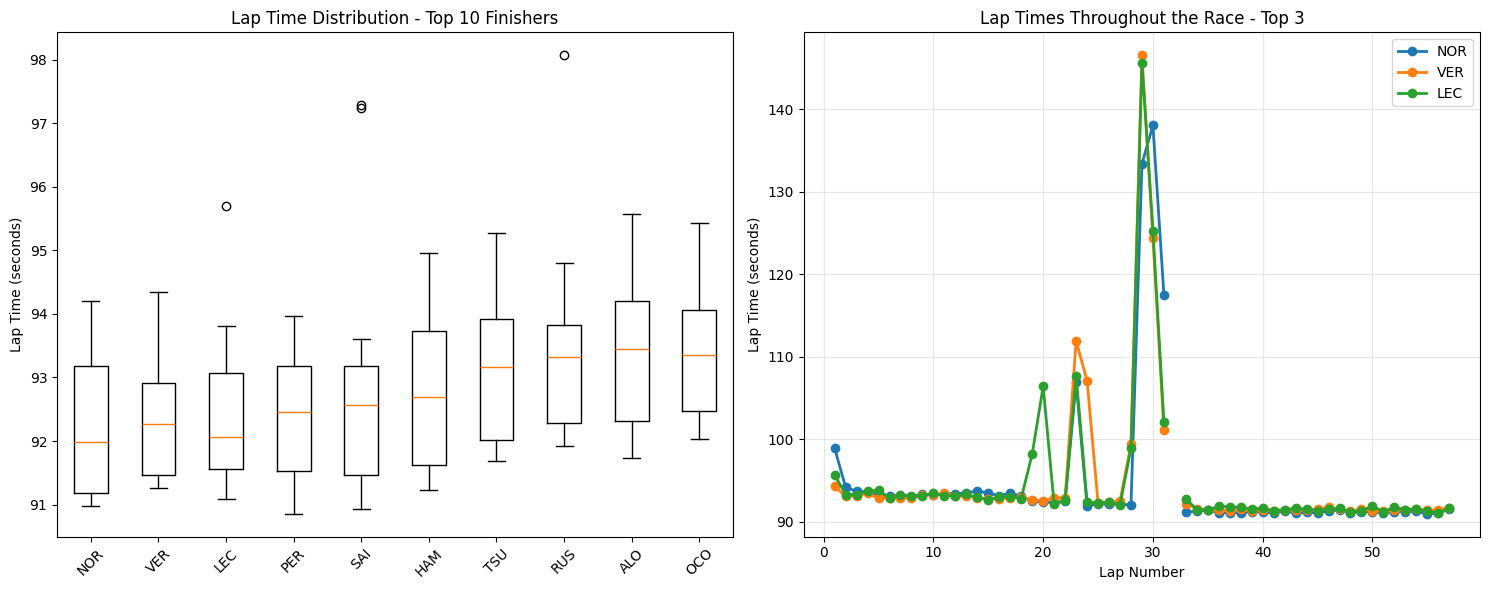

In [15]:
print("\nCreating lap time visualization...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Box plot of lap times by driver (top 10 drivers by position)
race_results = session.results.head(10)
top_drivers = race_results['Abbreviation'].tolist()

lap_times_by_driver = []
driver_labels = []

for driver in top_drivers:
    driver_laps = laps.pick_driver(driver).pick_quicklaps()
    if not driver_laps.empty:
        # Convert lap times to seconds for easier plotting
        lap_times_seconds = driver_laps['LapTime'].dt.total_seconds()
        lap_times_by_driver.append(lap_times_seconds)
        driver_labels.append(driver)

ax1.boxplot(lap_times_by_driver, labels=driver_labels)
ax1.set_title('Lap Time Distribution - Top 10 Finishers')
ax1.set_ylabel('Lap Time (seconds)')
ax1.tick_params(axis='x', rotation=45)

for i, driver in enumerate(top_drivers[:3]):
    driver_laps = laps.pick_driver(driver)
    lap_times = driver_laps['LapTime'].dt.total_seconds()
    lap_numbers = driver_laps['LapNumber']

    ax2.plot(lap_numbers, lap_times, marker='o', label=driver, linewidth=2)

ax2.set_title('Lap Times Throughout the Race - Top 3')
ax2.set_xlabel('Lap Number')
ax2.set_ylabel('Lap Time (seconds)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## TELEMETRY DATA ANALYSIS

In [16]:
telemetry_drivers = top_drivers[:3]  # Top 3 finishers
fastest_laps_tel = {}

for driver in telemetry_drivers:
    driver_fastest = laps.pick_driver(driver).pick_fastest()
    tel = driver_fastest.get_telemetry()
    fastest_laps_tel[driver] = tel
    print(f"{driver}: Fastest lap loaded ({len(tel)} data points)")

NOR: Fastest lap loaded (694 data points)


/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


VER: Fastest lap loaded (721 data points)


/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


LEC: Fastest lap loaded (696 data points)


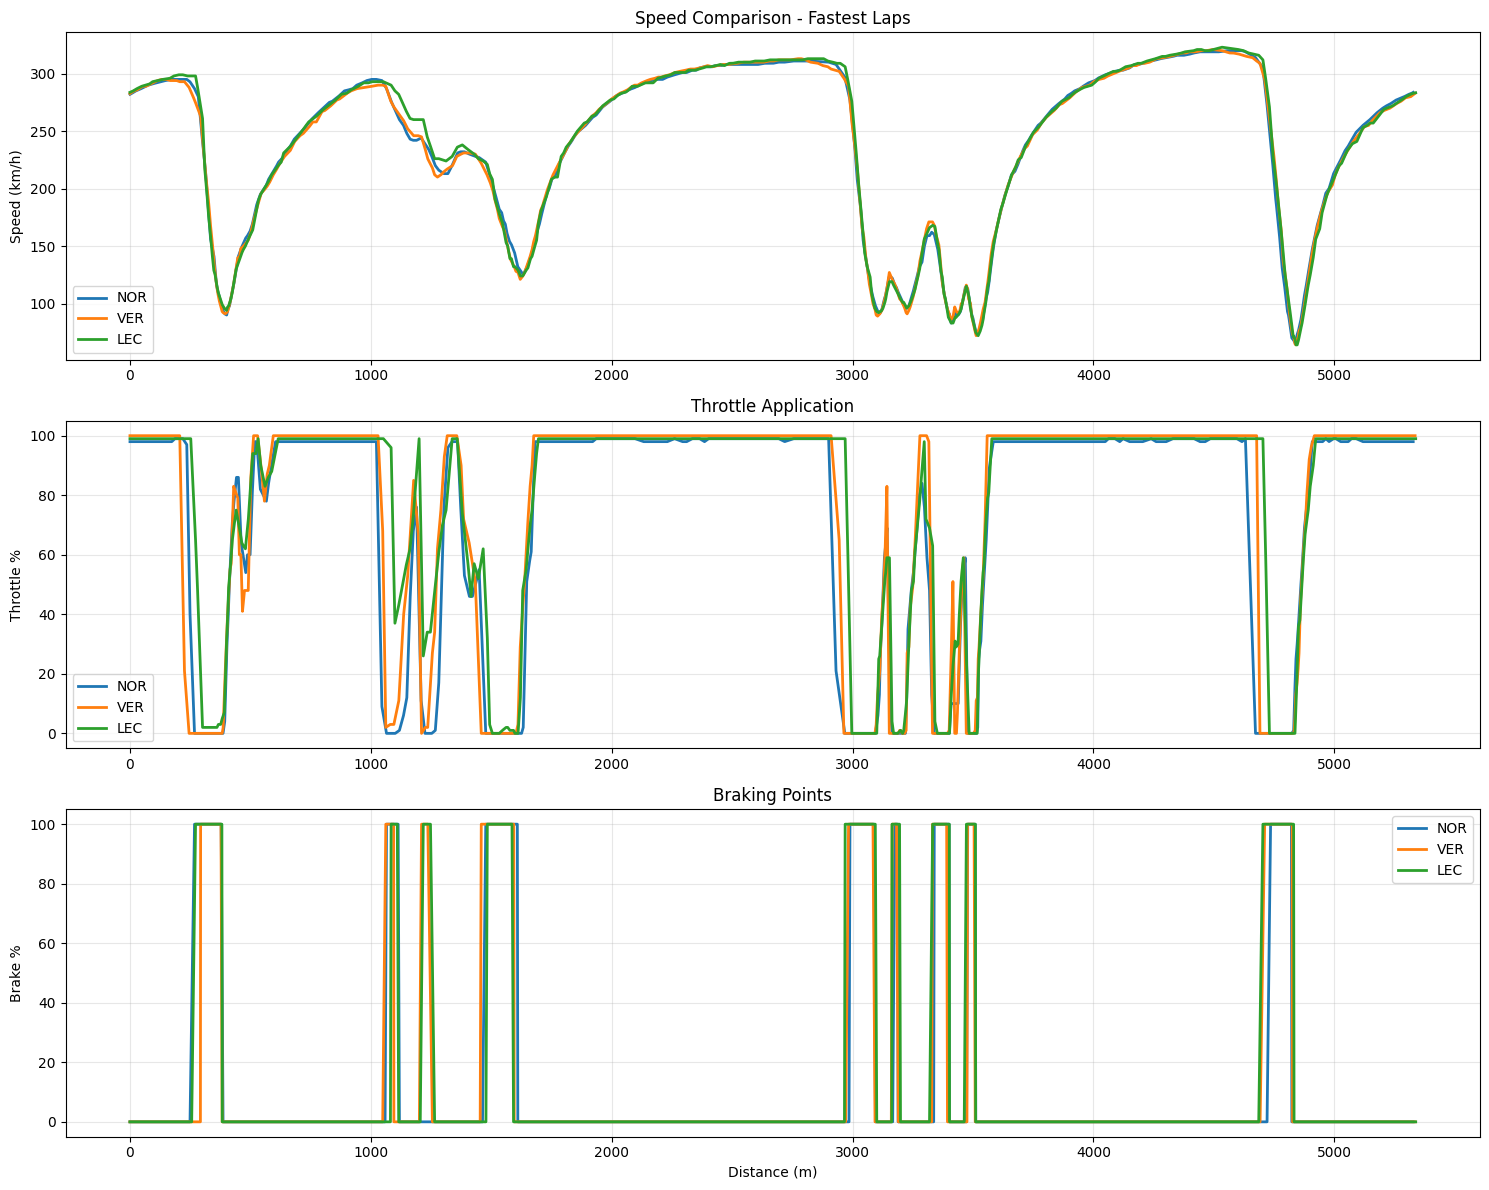

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Speed comparison
for driver in telemetry_drivers:
    tel = fastest_laps_tel[driver]
    axes[0].plot(tel['Distance'], tel['Speed'], label=driver, linewidth=2)
axes[0].set_title('Speed Comparison - Fastest Laps')
axes[0].set_ylabel('Speed (km/h)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Throttle comparison
for driver in telemetry_drivers:
    tel = fastest_laps_tel[driver]
    axes[1].plot(tel['Distance'], tel['Throttle'], label=driver, linewidth=2)
axes[1].set_title('Throttle Application')
axes[1].set_ylabel('Throttle %')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Brake comparison
for driver in telemetry_drivers:
    tel = fastest_laps_tel[driver]
    # Convert brake to percentage (0-100)
    brake_pct = tel['Brake'] * 100
    axes[2].plot(tel['Distance'], brake_pct, label=driver, linewidth=2)
axes[2].set_title('Braking Points')
axes[2].set_xlabel('Distance (m)')
axes[2].set_ylabel('Brake %')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## TIRE STRATEGY ANALYSIS

/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: Fut

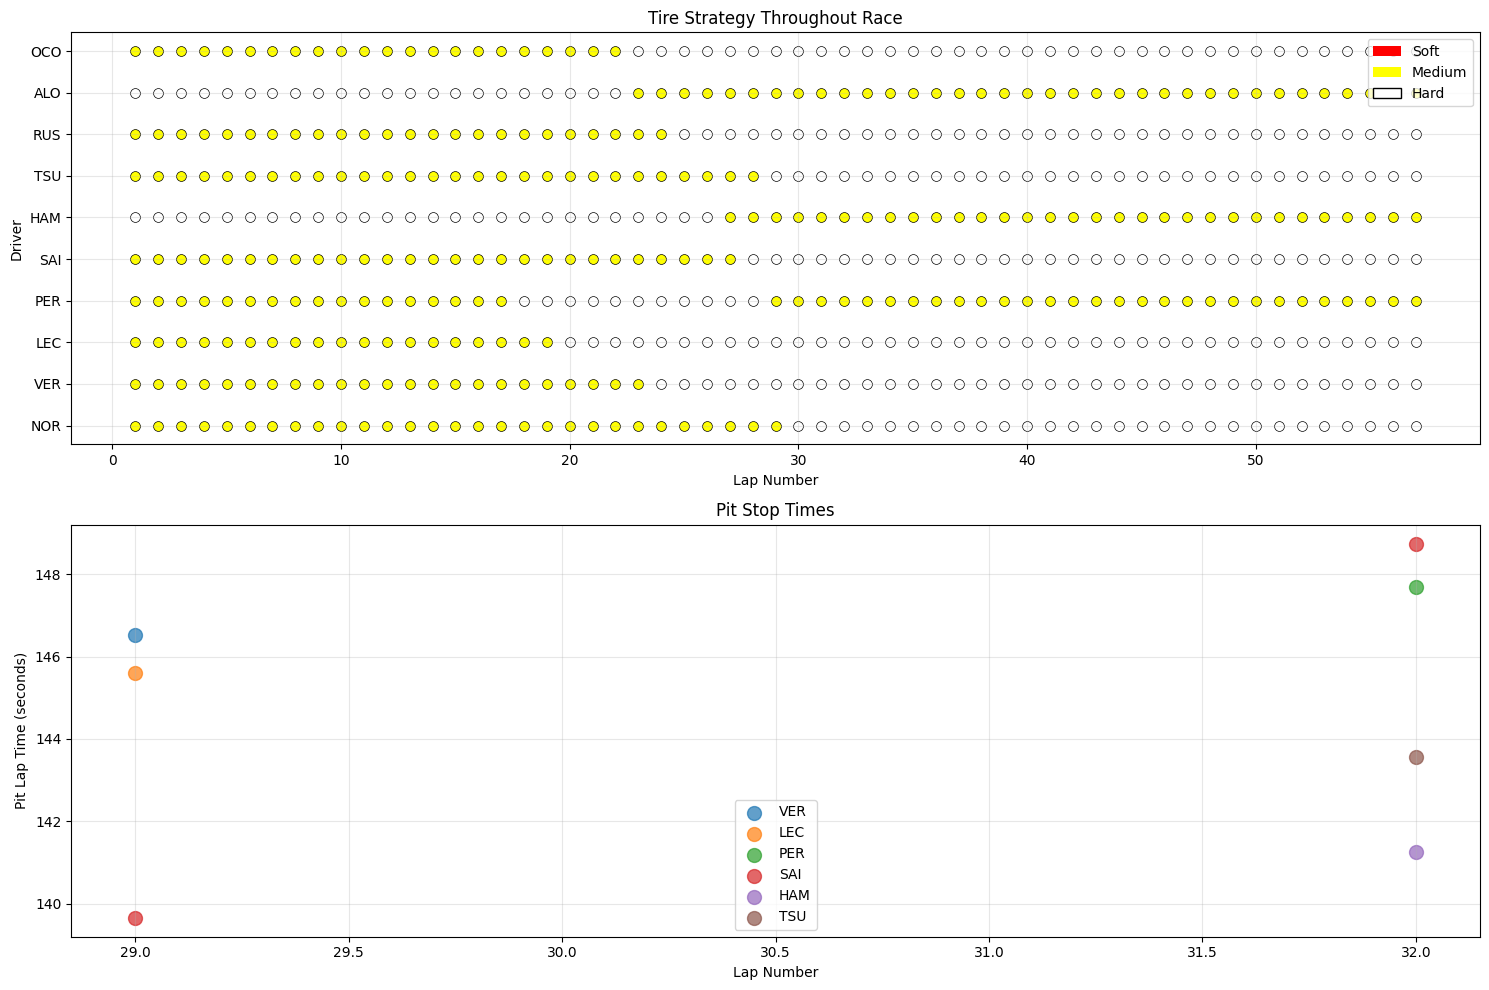

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Tire compound usage throughout race
strategy_drivers = top_drivers[:10]  # Top 5 for clarity

for driver in strategy_drivers:
    driver_laps = laps.pick_driver(driver)

    # Get tire compound for each lap
    compounds = []
    lap_numbers = []

    for _, lap in driver_laps.iterrows():
        if not pd.isna(lap['Compound']):
            compounds.append(lap['Compound'])
            lap_numbers.append(lap['LapNumber'])

    # Create scatter plot with different colors for compounds
    compound_colors = {'SOFT': 'red', 'MEDIUM': 'yellow', 'HARD': 'white', 'INTERMEDIATE': 'green', 'WET': 'blue'}

    for i, (lap_num, compound) in enumerate(zip(lap_numbers, compounds)):
        color = compound_colors.get(compound, 'gray')
        ax1.scatter(lap_num, driver, c=color, s=50, edgecolors='black', linewidth=0.5)

ax1.set_title('Tire Strategy Throughout Race')
ax1.set_xlabel('Lap Number')
ax1.set_ylabel('Driver')
ax1.set_yticks(range(len(strategy_drivers)))
ax1.set_yticklabels(strategy_drivers)
ax1.grid(True, alpha=0.3)

# Create legend for tire compounds
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='Soft'),
                   Patch(facecolor='yellow', label='Medium'),
                   Patch(facecolor='white', edgecolor='black', label='Hard')]
ax1.legend(handles=legend_elements, loc='upper right')

# Plot 2: Pit stop analysis
pit_stops = []
for driver in strategy_drivers:
    driver_laps = laps.pick_driver(driver)

    # Find pit stops (where lap time is significantly higher)
    median_time = driver_laps['LapTime'].median()
    pit_laps = driver_laps[driver_laps['LapTime'] > median_time * 1.5]

    for _, pit_lap in pit_laps.iterrows():
        pit_stops.append({
            'Driver': driver,
            'Lap': pit_lap['LapNumber'],
            'PitTime': pit_lap['LapTime'].total_seconds()
        })

if pit_stops:
    pit_df = pd.DataFrame(pit_stops)
    for driver in strategy_drivers:
        driver_pits = pit_df[pit_df['Driver'] == driver]
        if not driver_pits.empty:
            ax2.scatter(driver_pits['Lap'], driver_pits['PitTime'],
                       label=driver, s=100, alpha=0.7)

ax2.set_title('Pit Stop Times')
ax2.set_xlabel('Lap Number')
ax2.set_ylabel('Pit Lap Time (seconds)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## QUALIFYING vs RACE PACE COMPARISON

In [19]:
# Load qualifying session
print("Loading qualifying data...")
quali_session = fastf1.get_session(2024, 'Miami Grand Prix', 'Q')
quali_session.load()

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Qualifying [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...


Loading qualifying data...


req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for track_status_data. Loading data...
_api  

In [20]:
# Compare qualifying vs race pace
comparison_data = []
for driver in top_drivers[:10]:  # Top 10 for analysis
    # Get qualifying best time
    quali_laps = quali_session.laps.pick_driver(driver)
    if not quali_laps.empty:
        quali_best = quali_laps.pick_fastest()['LapTime'].total_seconds()
    else:
        quali_best = None

    # Get race pace (average of fastest 10 laps)
    race_laps = laps.pick_driver(driver).pick_quicklaps()
    if len(race_laps) >= 10:
        race_pace = race_laps.nsmallest(10, 'LapTime')['LapTime'].mean().total_seconds()
    else:
        race_pace = None

    if quali_best and race_pace:
        comparison_data.append({
            'Driver': driver,
            'Qualifying': quali_best,
            'Race_Pace': race_pace,
            'Difference': race_pace - quali_best
        })

if comparison_data:
    comp_df = pd.DataFrame(comparison_data)

/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: Fut

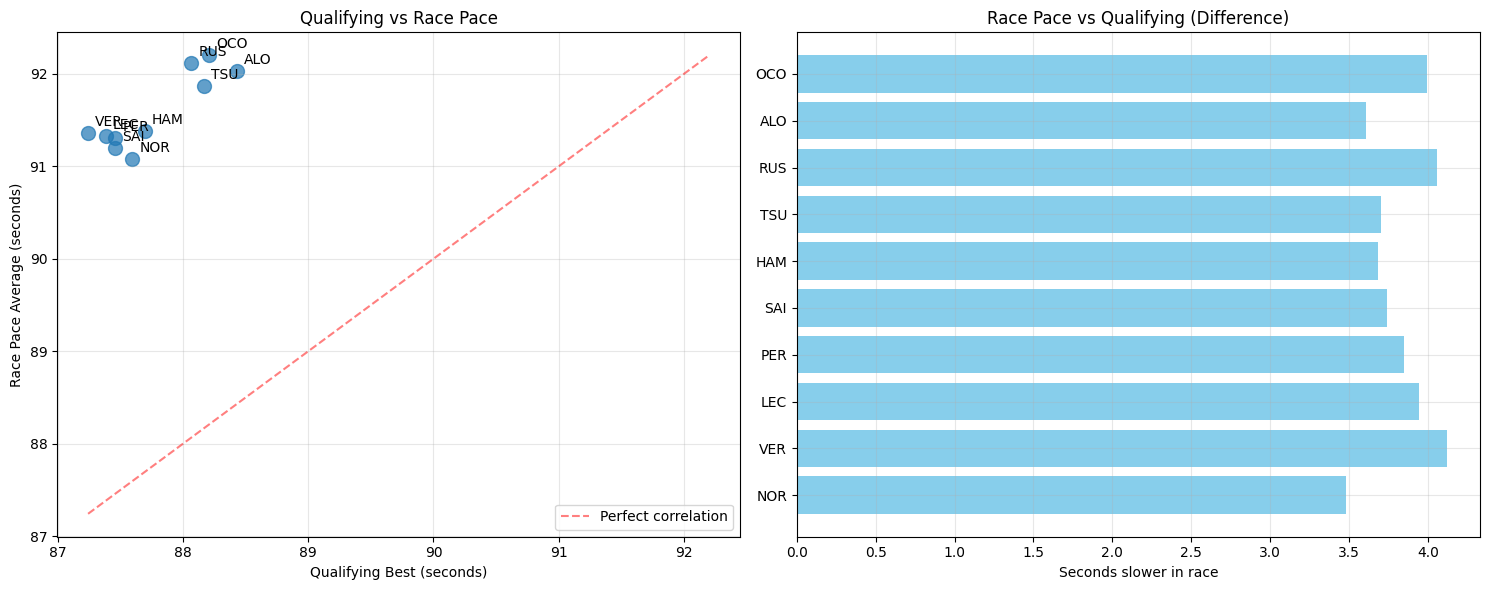

In [21]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Quali vs Race times
    ax1.scatter(comp_df['Qualifying'], comp_df['Race_Pace'], s=100, alpha=0.7)

    # Add driver labels
    for _, row in comp_df.iterrows():
        ax1.annotate(row['Driver'], (row['Qualifying'], row['Race_Pace']),
                    xytext=(5, 5), textcoords='offset points')

    # Add diagonal line (perfect correlation)
    min_time = min(comp_df['Qualifying'].min(), comp_df['Race_Pace'].min())
    max_time = max(comp_df['Qualifying'].max(), comp_df['Race_Pace'].max())
    ax1.plot([min_time, max_time], [min_time, max_time], 'r--', alpha=0.5, label='Perfect correlation')

    ax1.set_title('Qualifying vs Race Pace')
    ax1.set_xlabel('Qualifying Best (seconds)')
    ax1.set_ylabel('Race Pace Average (seconds)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Pace difference chart
    ax2.barh(comp_df['Driver'], comp_df['Difference'], color='skyblue')
    ax2.set_title('Race Pace vs Qualifying (Difference)')
    ax2.set_xlabel('Seconds slower in race')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [22]:
print("\n=== PACE ANALYSIS INSIGHTS ===")
best_race_pacer = comp_df.loc[comp_df['Difference'].idxmin(), 'Driver']
worst_race_pacer = comp_df.loc[comp_df['Difference'].idxmax(), 'Driver']
print(f"Best race pacer (smallest quali-race gap): {best_race_pacer}")
print(f"Biggest quali-race gap: {worst_race_pacer}")


=== PACE ANALYSIS INSIGHTS ===
Best race pacer (smallest quali-race gap): NOR
Biggest quali-race gap: VER


## TRACK POSITION VISUALIZATION

In [23]:
print("Creating position visualization...")

position_data = []
for lap_num in range(1, session.total_laps + 1):
    lap_data = laps[laps['LapNumber'] == lap_num]
    if not lap_data.empty:
        for _, row in lap_data.iterrows():
            position_data.append({
                'Lap': lap_num,
                'Driver': row['Driver'],
                'Position': row['Position']
            })

if position_data:
    pos_df = pd.DataFrame(position_data)

Creating position visualization...


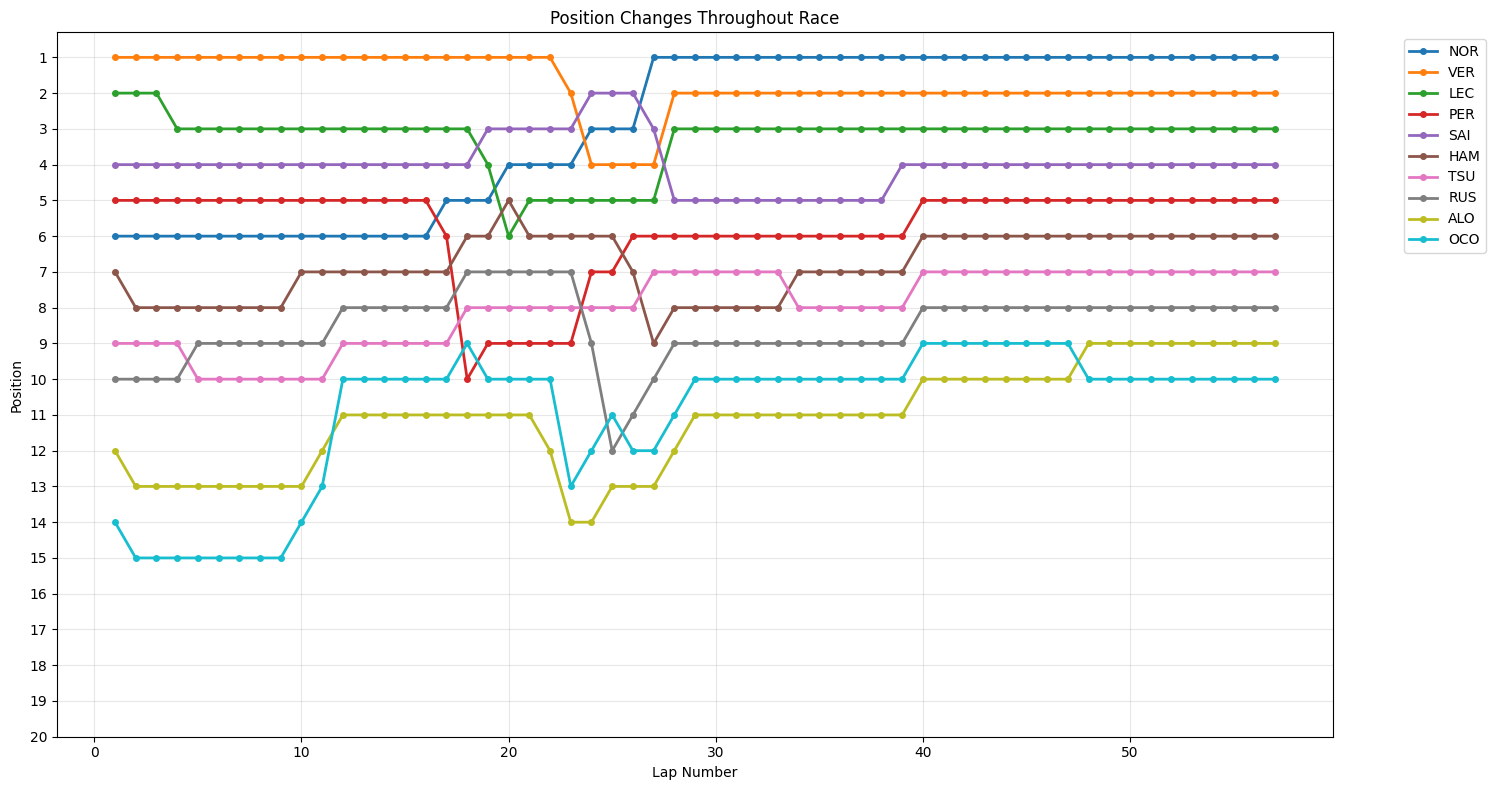

In [24]:
    fig, ax = plt.subplots(figsize=(15, 8))

    # Plot position changes for top 10 drivers
    for driver in top_drivers:
        driver_data = pos_df[pos_df['Driver'] == driver]
        if not driver_data.empty:
            ax.plot(driver_data['Lap'], driver_data['Position'],
                   marker='o', label=driver, linewidth=2, markersize=4)

    ax.set_title('Position Changes Throughout Race')
    ax.set_xlabel('Lap Number')
    ax.set_ylabel('Position')
    ax.invert_yaxis()  # Position 1 at top
    ax.set_yticks(range(1, 21))
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

## WEATHER IMPACT ANALYSIS

In [25]:
weather_data = session.weather_data

if not weather_data.empty:
    print(f"Weather data points: {len(weather_data)}")
    print("Weather conditions during race:")
    print(weather_data[['Time', 'AirTemp', 'TrackTemp', 'Humidity', 'Rainfall']].head())

Weather data points: 150
Weather conditions during race:
                    Time  AirTemp  TrackTemp  Humidity  Rainfall
0 0 days 00:00:26.389000     28.6       46.4      57.0     False
1 0 days 00:01:26.391000     28.8       47.2      57.0     False
2 0 days 00:02:26.390000     28.6       47.6      57.0     False
3 0 days 00:03:26.390000     28.5       47.5      57.0     False
4 0 days 00:04:26.390000     28.5       46.4      57.0     False


In [26]:
weather_data.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:26.389000,28.6,57.0,1017.0,False,46.4,166,3.3
1,0 days 00:01:26.391000,28.8,57.0,1017.0,False,47.2,163,3.4
2,0 days 00:02:26.390000,28.6,57.0,1017.0,False,47.6,169,3.4
3,0 days 00:03:26.390000,28.5,57.0,1016.9,False,47.5,145,3.6
4,0 days 00:04:26.390000,28.5,57.0,1016.9,False,46.4,147,4.0


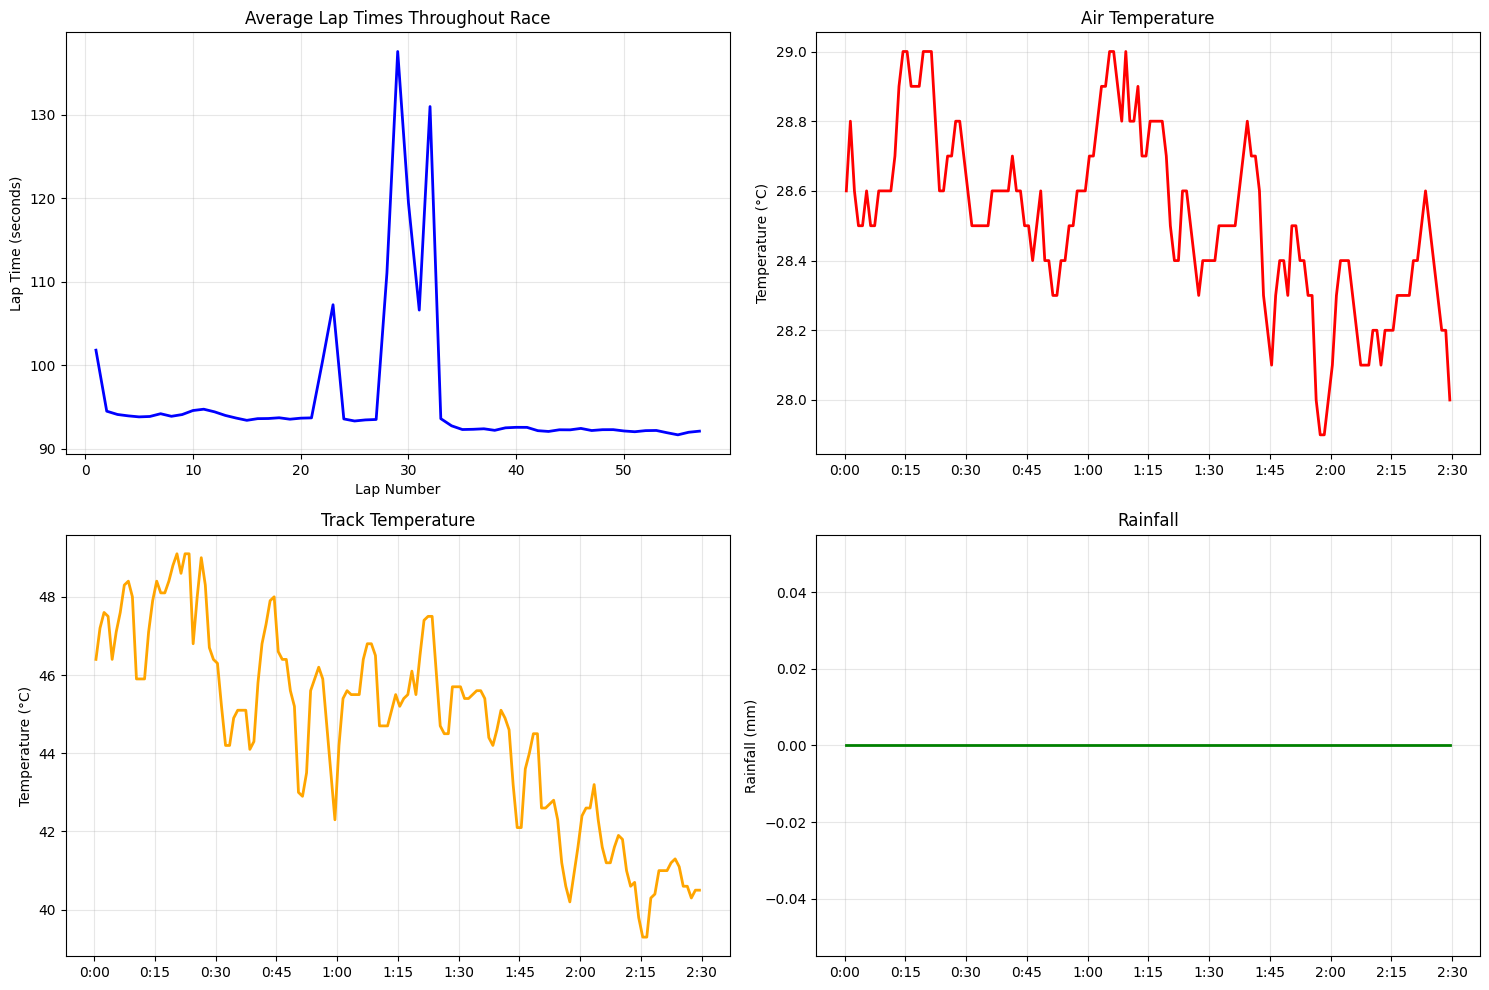

In [27]:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Temperature vs Lap Times
    # Get average lap time per lap
    avg_lap_times = []
    lap_numbers = []

    for lap_num in range(1, min(session.total_laps + 1, 60)):  # First 60 laps
        lap_times = laps[laps['LapNumber'] == lap_num]['LapTime'].dt.total_seconds()
        valid_times = lap_times.dropna()
        if len(valid_times) > 5:  # Need reasonable sample
            avg_lap_times.append(valid_times.median())
            lap_numbers.append(lap_num)

    axes[0,0].plot(lap_numbers, avg_lap_times, 'b-', linewidth=2)
    axes[0,0].set_title('Average Lap Times Throughout Race')
    axes[0,0].set_xlabel('Lap Number')
    axes[0,0].set_ylabel('Lap Time (seconds)')
    axes[0,0].grid(True, alpha=0.3)

    # Air Temperature
    axes[0,1].plot(weather_data['Time'], weather_data['AirTemp'], 'r-', linewidth=2)
    axes[0,1].set_title('Air Temperature')
    axes[0,1].set_ylabel('Temperature (°C)')
    axes[0,1].grid(True, alpha=0.3)

    # Track Temperature
    axes[1,0].plot(weather_data['Time'], weather_data['TrackTemp'], 'orange', linewidth=2)
    axes[1,0].set_title('Track Temperature')
    axes[1,0].set_ylabel('Temperature (°C)')
    axes[1,0].grid(True, alpha=0.3)

    # Rainfall
    axes[1,1].plot(weather_data['Time'], weather_data['Rainfall'], 'g-', linewidth=2)
    axes[1,1].set_title('Rainfall')
    axes[1,1].set_ylabel('Rainfall (mm)')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [28]:
    # Weather summary
    print(f"Air temp range: {weather_data['AirTemp'].min():.1f}°C - {weather_data['AirTemp'].max():.1f}°C")
    print(f"Track temp range: {weather_data['TrackTemp'].min():.1f}°C - {weather_data['TrackTemp'].max():.1f}°C")
    print(f"Total rainfall: {weather_data['Rainfall'].sum():.1f}mm")
    print(f"Average humidity: {weather_data['Humidity'].mean():.1f}%")

Air temp range: 27.9°C - 29.0°C
Track temp range: 39.3°C - 49.1°C
Total rainfall: 0.0mm
Average humidity: 59.0%


## TRACK VISUALIZATION AND RACING LINES

In [29]:
track_drivers = top_drivers[:1]  # Top 10 for clarity
racing_lines = {}

for driver in track_drivers:
    fastest_lap = laps.pick_driver(driver).pick_fastest()
    if not fastest_lap.empty:
        telemetry = fastest_lap.get_pos_data()  # Get position data
        racing_lines[driver] = telemetry
        print(f"{driver}: Racing line data loaded ({len(telemetry)} points)")

NOR: Racing line data loaded (350 points)


/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


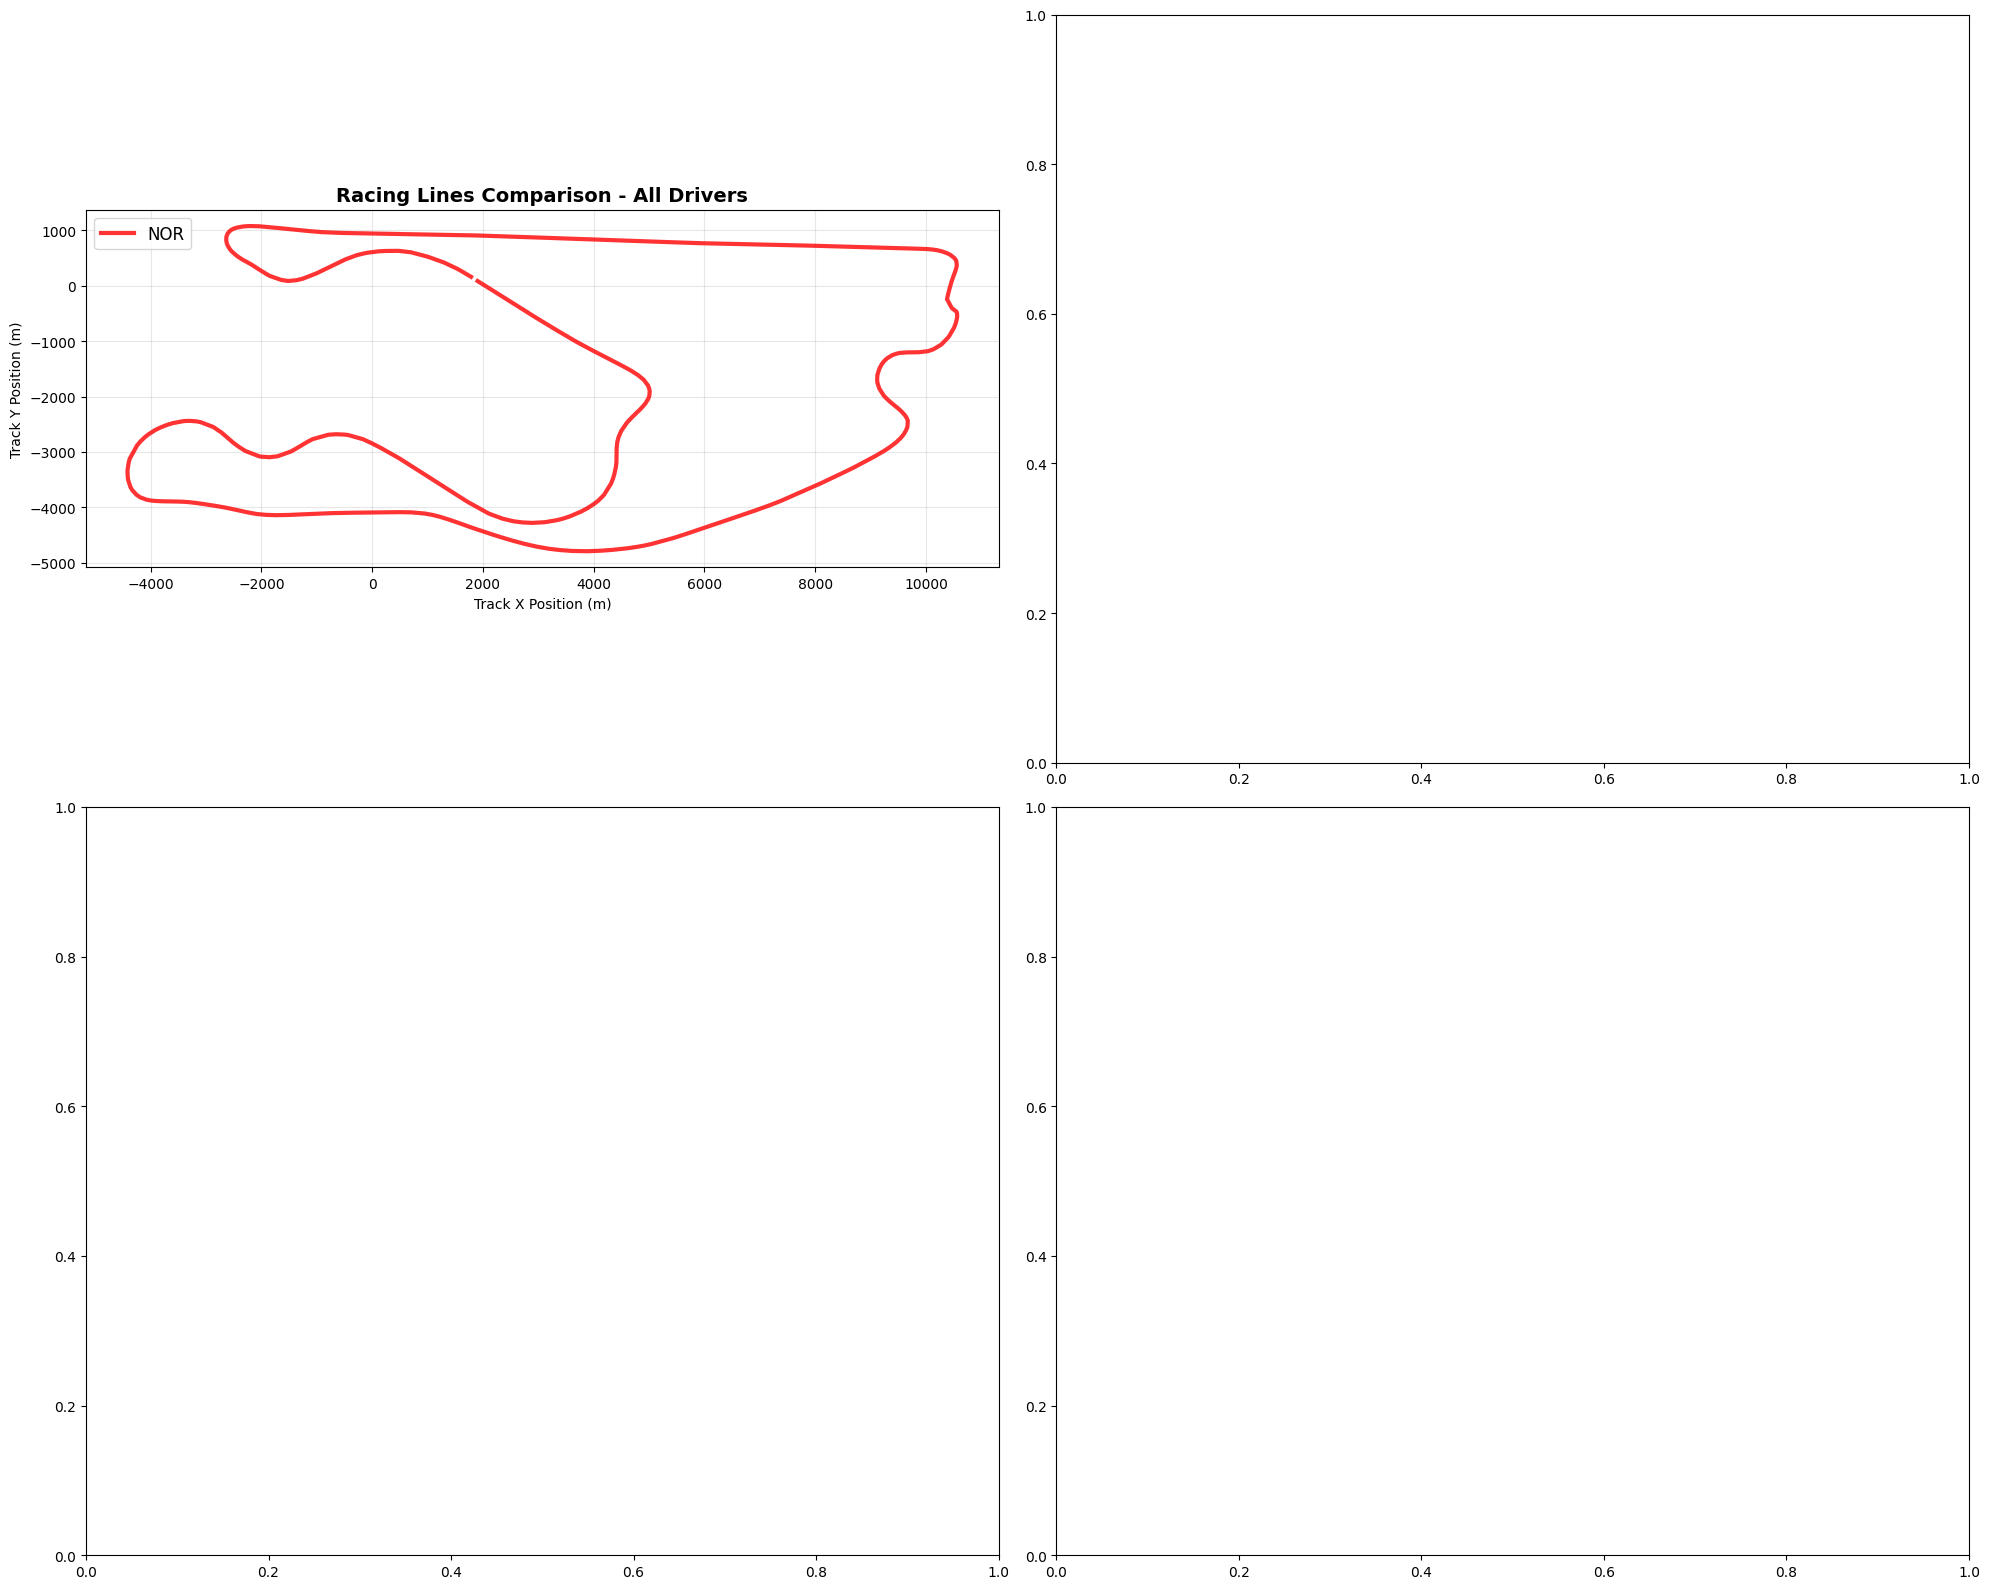


Analyzing specific corners...


/tmp/ipython-input-2101471626.py:117: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=12)


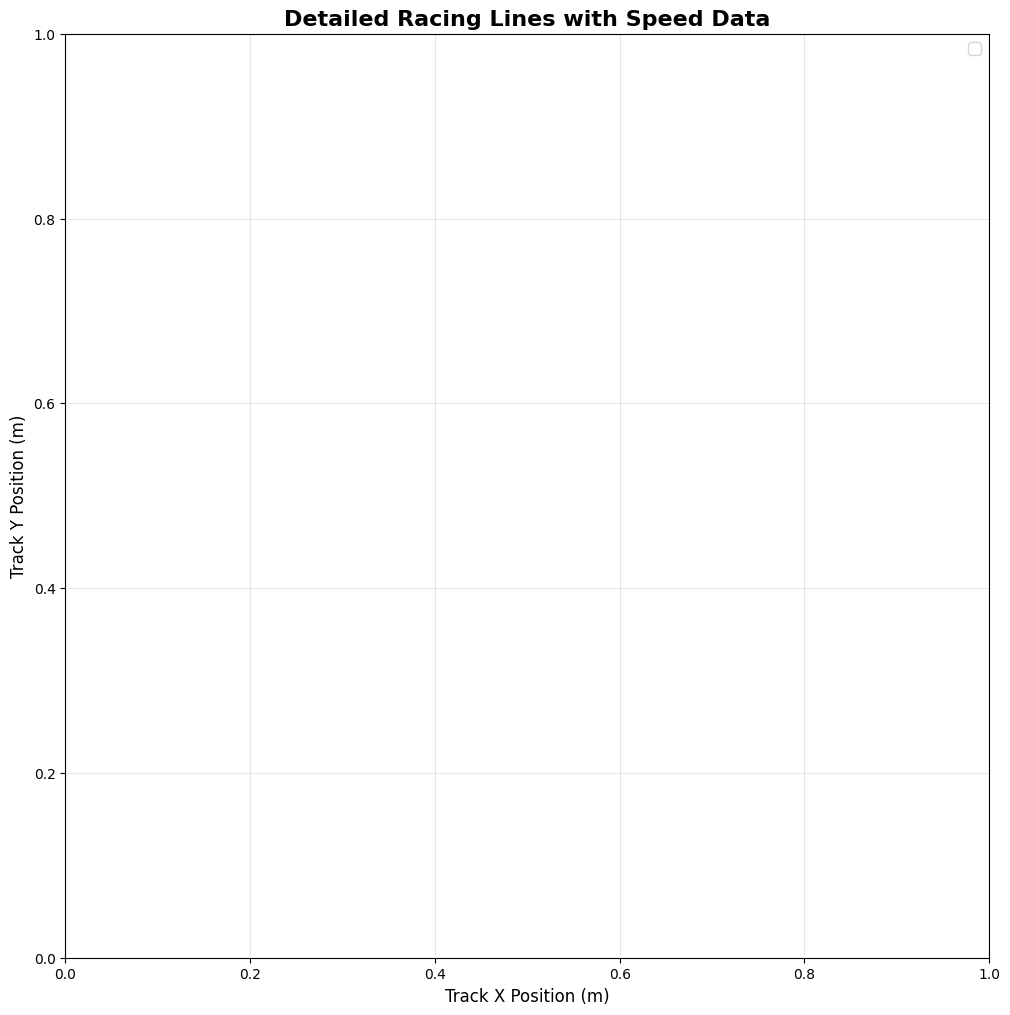

In [30]:
if racing_lines:
    # Create track visualization with racing lines
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))

    # Plot 1: All racing lines overlaid
    ax1 = axes[0,0]
    colors = ['red', 'blue', 'green', 'orange']

    for i, (driver, telemetry) in enumerate(racing_lines.items()):
        if not telemetry.empty:
            ax1.plot(telemetry['X'], telemetry['Y'],
                    color=colors[i % len(colors)],
                    linewidth=3,
                    label=f'{driver}',
                    alpha=0.8)

    ax1.set_title('Racing Lines Comparison - All Drivers', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Track X Position (m)')
    ax1.set_ylabel('Track Y Position (m)')
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')

    # Plot 2: Speed visualization on track
    ax2 = axes[0,1]

    # Use the fastest driver's line as base
    fastest_driver = track_drivers[0]
    base_telemetry = racing_lines[fastest_driver]

    if not base_telemetry.empty and 'Speed' in base_telemetry.columns:
        scatter = ax2.scatter(base_telemetry['X'], base_telemetry['Y'],
                             c=base_telemetry['Speed'],
                             cmap='RdYlBu_r',
                             s=10,
                             alpha=0.8)

        ax2.set_title(f'Speed Heatmap - {fastest_driver}', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Track X Position (m)')
        ax2.set_ylabel('Track Y Position (m)')
        ax2.set_aspect('equal')

        # Add colorbar
        cbar = plt.colorbar(scatter, ax=ax2)
        cbar.set_label('Speed (km/h)', fontsize=12)

    # Plot 3: Throttle application on track
    ax3 = axes[1,0]

    if not base_telemetry.empty and 'Throttle' in base_telemetry.columns:
        scatter3 = ax3.scatter(base_telemetry['X'], base_telemetry['Y'],
                              c=base_telemetry['Throttle'],
                              cmap='RdYlGn',
                              s=10,
                              alpha=0.8)

        ax3.set_title(f'Throttle Application - {fastest_driver}', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Track X Position (m)')
        ax3.set_ylabel('Track Y Position (m)')
        ax3.set_aspect('equal')

        cbar3 = plt.colorbar(scatter3, ax=ax3)
        cbar3.set_label('Throttle %', fontsize=12)

    # Plot 4: Brake pressure on track
    ax4 = axes[1,1]

    if not base_telemetry.empty and 'Brake' in base_telemetry.columns:
        # Convert brake to percentage
        brake_pct = base_telemetry['Brake'] * 100
        scatter4 = ax4.scatter(base_telemetry['X'], base_telemetry['Y'],
                              c=brake_pct,
                              cmap='Reds',
                              s=10,
                              alpha=0.8)

        ax4.set_title(f'Braking Points - {fastest_driver}', fontsize=14, fontweight='bold')
        ax4.set_xlabel('Track X Position (m)')
        ax4.set_ylabel('Track Y Position (m)')
        ax4.set_aspect('equal')

        cbar4 = plt.colorbar(scatter4, ax=ax4)
        cbar4.set_label('Brake Pressure %', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Create detailed corner analysis
    print("\nAnalyzing specific corners...")

    # Let's create a more detailed comparison of racing lines
    fig, ax = plt.subplots(figsize=(16, 12))

    # Plot racing lines with speed colormap for each driver
    for i, (driver, telemetry) in enumerate(racing_lines.items()):
        if not telemetry.empty and 'Speed' in telemetry.columns:
            # Create offset for better visualization
            offset_x = (i * 2)  # Small offset to separate lines
            offset_y = (i * 2)

            scatter = ax.scatter(telemetry['X'] + offset_x,
                               telemetry['Y'] + offset_y,
                               c=telemetry['Speed'],
                               cmap='viridis',
                               s=3,
                               alpha=0.7,
                               label=f'{driver}')

            # Add colorbar inside the loop for each driver's scatter plot
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label(f'Speed ({driver} - km/h)', fontsize=12)


    ax.set_title('Detailed Racing Lines with Speed Data', fontsize=16, fontweight='bold')
    ax.set_xlabel('Track X Position (m)', fontsize=12)
    ax.set_ylabel('Track Y Position (m)', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')


    plt.show()

/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


NOR: Racing line data loaded (694 points)


/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


VER: Racing line data loaded (721 points)


/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


LEC: Racing line data loaded (696 points)


/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


PER: Racing line data loaded (691 points)
Creating track visualizations with position data...


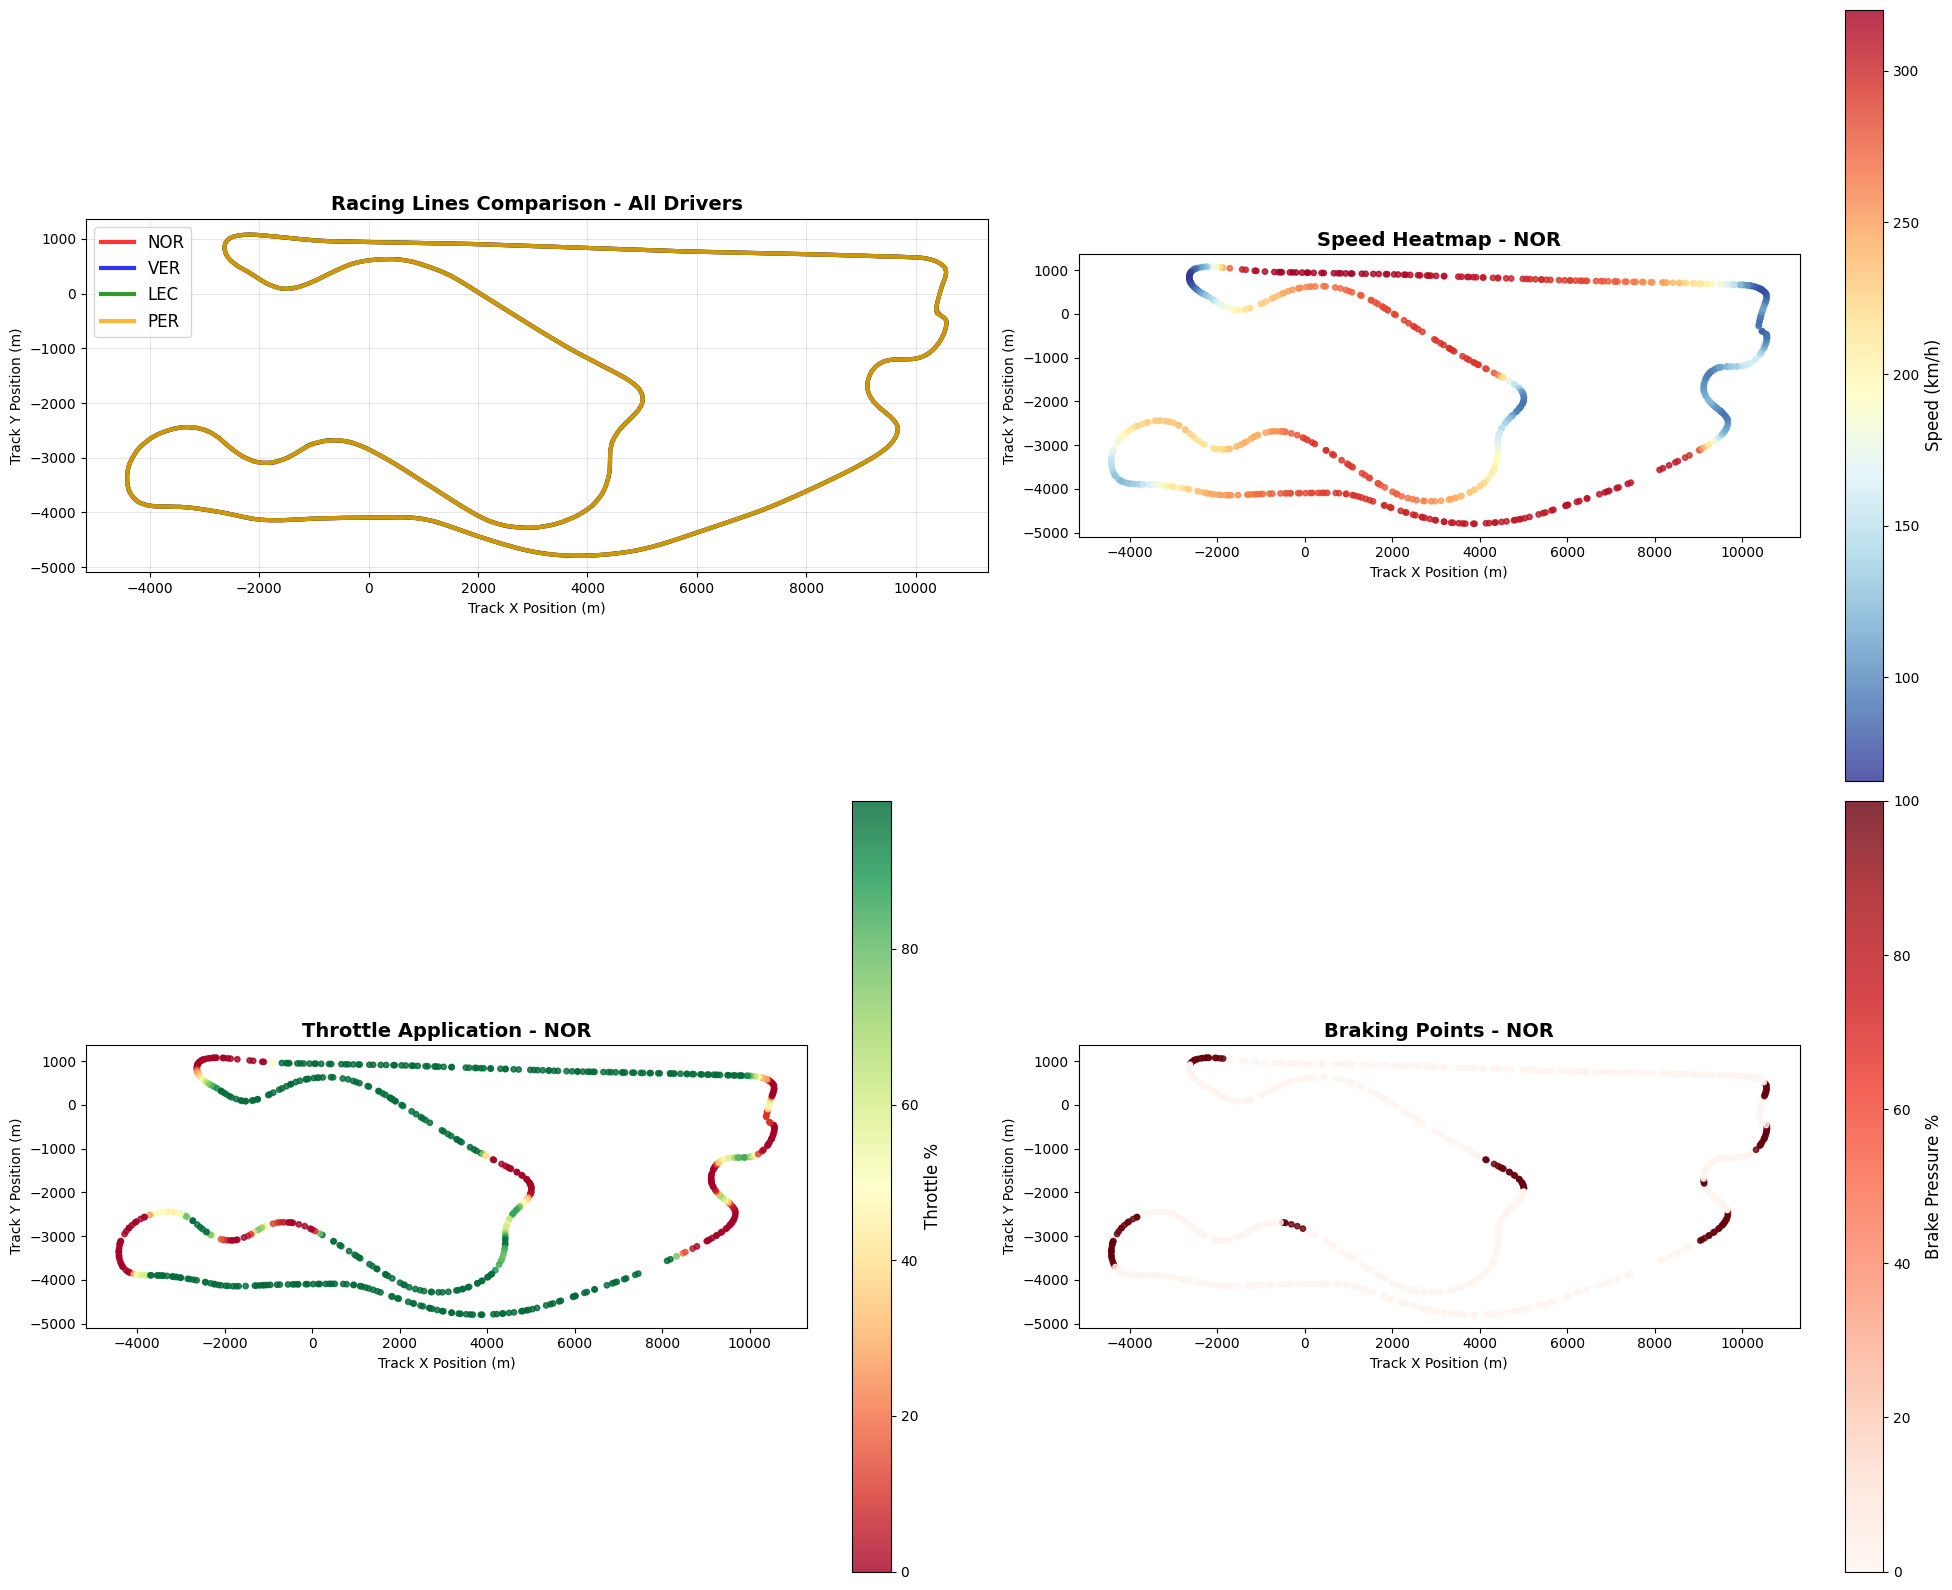

In [31]:
# Get telemetry for fastest laps of our comparison drivers
track_drivers = top_drivers[:4]  # Top 4 for clarity
racing_lines = {}

for driver in track_drivers:
    fastest_lap = laps.pick_driver(driver).pick_fastest()
    if not fastest_lap.empty:
        try:
            # Get full telemetry data (includes X, Y coordinates if available)
            telemetry = fastest_lap.get_telemetry()

            # Check if position data is available
            if 'X' in telemetry.columns and 'Y' in telemetry.columns:
                racing_lines[driver] = telemetry
                print(f"{driver}: Racing line data loaded ({len(telemetry)} points)")
            else:
                print(f"{driver}: Position data not available")

        except Exception as e:
            print(f"Error loading telemetry for {driver}: {e}")

# Check if we have position data for visualization
has_position_data = any('X' in tel.columns and 'Y' in tel.columns
                       for tel in racing_lines.values() if not tel.empty)

if racing_lines and has_position_data:
    print("Creating track visualizations with position data...")

    # Create track visualization with racing lines
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))

    # Plot 1: All racing lines overlaid
    ax1 = axes[0,0]
    colors = ['red', 'blue', 'green', 'orange']

    for i, (driver, telemetry) in enumerate(racing_lines.items()):
        if not telemetry.empty and 'X' in telemetry.columns and 'Y' in telemetry.columns:
            ax1.plot(telemetry['X'], telemetry['Y'],
                    color=colors[i % len(colors)],
                    linewidth=3,
                    label=f'{driver}',
                    alpha=0.8)

    ax1.set_title('Racing Lines Comparison - All Drivers', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Track X Position (m)')
    ax1.set_ylabel('Track Y Position (m)')
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')

    # Plot 2: Speed visualization on track
    ax2 = axes[0,1]

    # Use the fastest driver's line as base
    fastest_driver = track_drivers[0]
    base_telemetry = racing_lines.get(fastest_driver)

    if (base_telemetry is not None and not base_telemetry.empty and
        'X' in base_telemetry.columns and 'Y' in base_telemetry.columns and
        'Speed' in base_telemetry.columns):

        scatter = ax2.scatter(base_telemetry['X'], base_telemetry['Y'],
                             c=base_telemetry['Speed'],
                             cmap='RdYlBu_r',
                             s=15,
                             alpha=0.8)

        ax2.set_title(f'Speed Heatmap - {fastest_driver}', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Track X Position (m)')
        ax2.set_ylabel('Track Y Position (m)')
        ax2.set_aspect('equal')

        # Add colorbar
        cbar = plt.colorbar(scatter, ax=ax2)
        cbar.set_label('Speed (km/h)', fontsize=12)

    # Plot 3: Throttle application on track
    ax3 = axes[1,0]

    if (base_telemetry is not None and not base_telemetry.empty and
        'Throttle' in base_telemetry.columns):

        scatter3 = ax3.scatter(base_telemetry['X'], base_telemetry['Y'],
                              c=base_telemetry['Throttle'],
                              cmap='RdYlGn',
                              s=15,
                              alpha=0.8)

        ax3.set_title(f'Throttle Application - {fastest_driver}', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Track X Position (m)')
        ax3.set_ylabel('Track Y Position (m)')
        ax3.set_aspect('equal')

        cbar3 = plt.colorbar(scatter3, ax=ax3)
        cbar3.set_label('Throttle %', fontsize=12)

    # Plot 4: Brake pressure on track
    ax4 = axes[1,1]

    if (base_telemetry is not None and not base_telemetry.empty and
        'Brake' in base_telemetry.columns):

        # Convert brake to percentage
        brake_pct = base_telemetry['Brake'] * 100
        scatter4 = ax4.scatter(base_telemetry['X'], base_telemetry['Y'],
                              c=brake_pct,
                              cmap='Reds',
                              s=15,
                              alpha=0.8)

        ax4.set_title(f'Braking Points - {fastest_driver}', fontsize=14, fontweight='bold')
        ax4.set_xlabel('Track X Position (m)')
        ax4.set_ylabel('Track Y Position (m)')
        ax4.set_aspect('equal')

        cbar4 = plt.colorbar(scatter4, ax=ax4)
        cbar4.set_label('Brake Pressure %', fontsize=12)

    plt.tight_layout()
    plt.show()


Creating detailed racing line comparison...


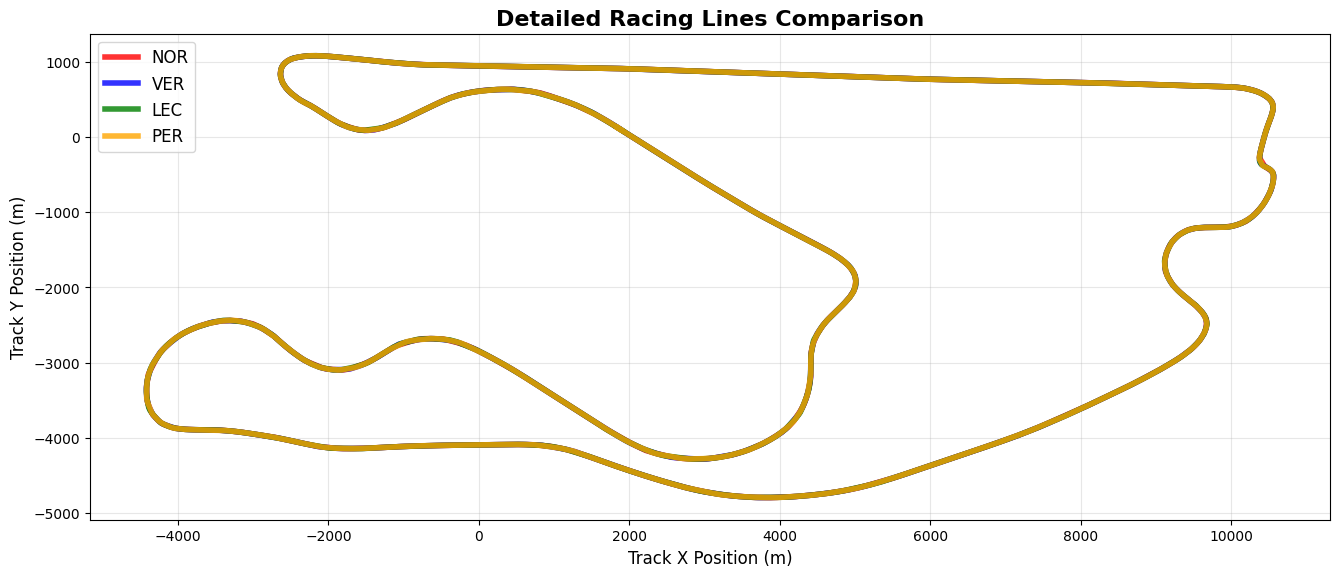

In [32]:
    # Create detailed comparison of racing lines
    print("\nCreating detailed racing line comparison...")

    fig, ax = plt.subplots(figsize=(16, 12))

    # Plot racing lines with different colors
    for i, (driver, telemetry) in enumerate(racing_lines.items()):
        if (not telemetry.empty and 'X' in telemetry.columns and
            'Y' in telemetry.columns and 'Speed' in telemetry.columns):

            # Use different colors for each driver
            ax.plot(telemetry['X'], telemetry['Y'],
                   color=colors[i % len(colors)],
                   linewidth=4,
                   label=f'{driver}',
                   alpha=0.8)

    ax.set_title('Detailed Racing Lines Comparison', fontsize=16, fontweight='bold')
    ax.set_xlabel('Track X Position (m)', fontsize=12)
    ax.set_ylabel('Track Y Position (m)', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

    plt.show()

## CORNER ANALYSIS

In [36]:
# Get telemetry for fastest laps of our comparison drivers
track_drivers = top_drivers[:4]  # Top 4 for clarity
racing_lines = {}

for driver in track_drivers:
    fastest_lap = laps.pick_driver(driver).pick_fastest()
    if not fastest_lap.empty:
        try:
            # Get full telemetry data (includes X, Y coordinates if available)
            telemetry = fastest_lap.get_telemetry()

            # Check if position data is available
            if 'X' in telemetry.columns and 'Y' in telemetry.columns:
                racing_lines[driver] = telemetry
                print(f"{driver}: Racing line data loaded ({len(telemetry)} points)")
            else:
                print(f"{driver}: Position data not available")

        except Exception as e:
            print(f"Error loading telemetry for {driver}: {e}")

# Check if we have position data for visualization
has_position_data = any('X' in tel.columns and 'Y' in tel.columns
                       for tel in racing_lines.values() if not tel.empty)

/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


NOR: Racing line data loaded (694 points)


/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


VER: Racing line data loaded (721 points)


/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


LEC: Racing line data loaded (696 points)


/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


PER: Racing line data loaded (691 points)


Creating track visualizations with position data...


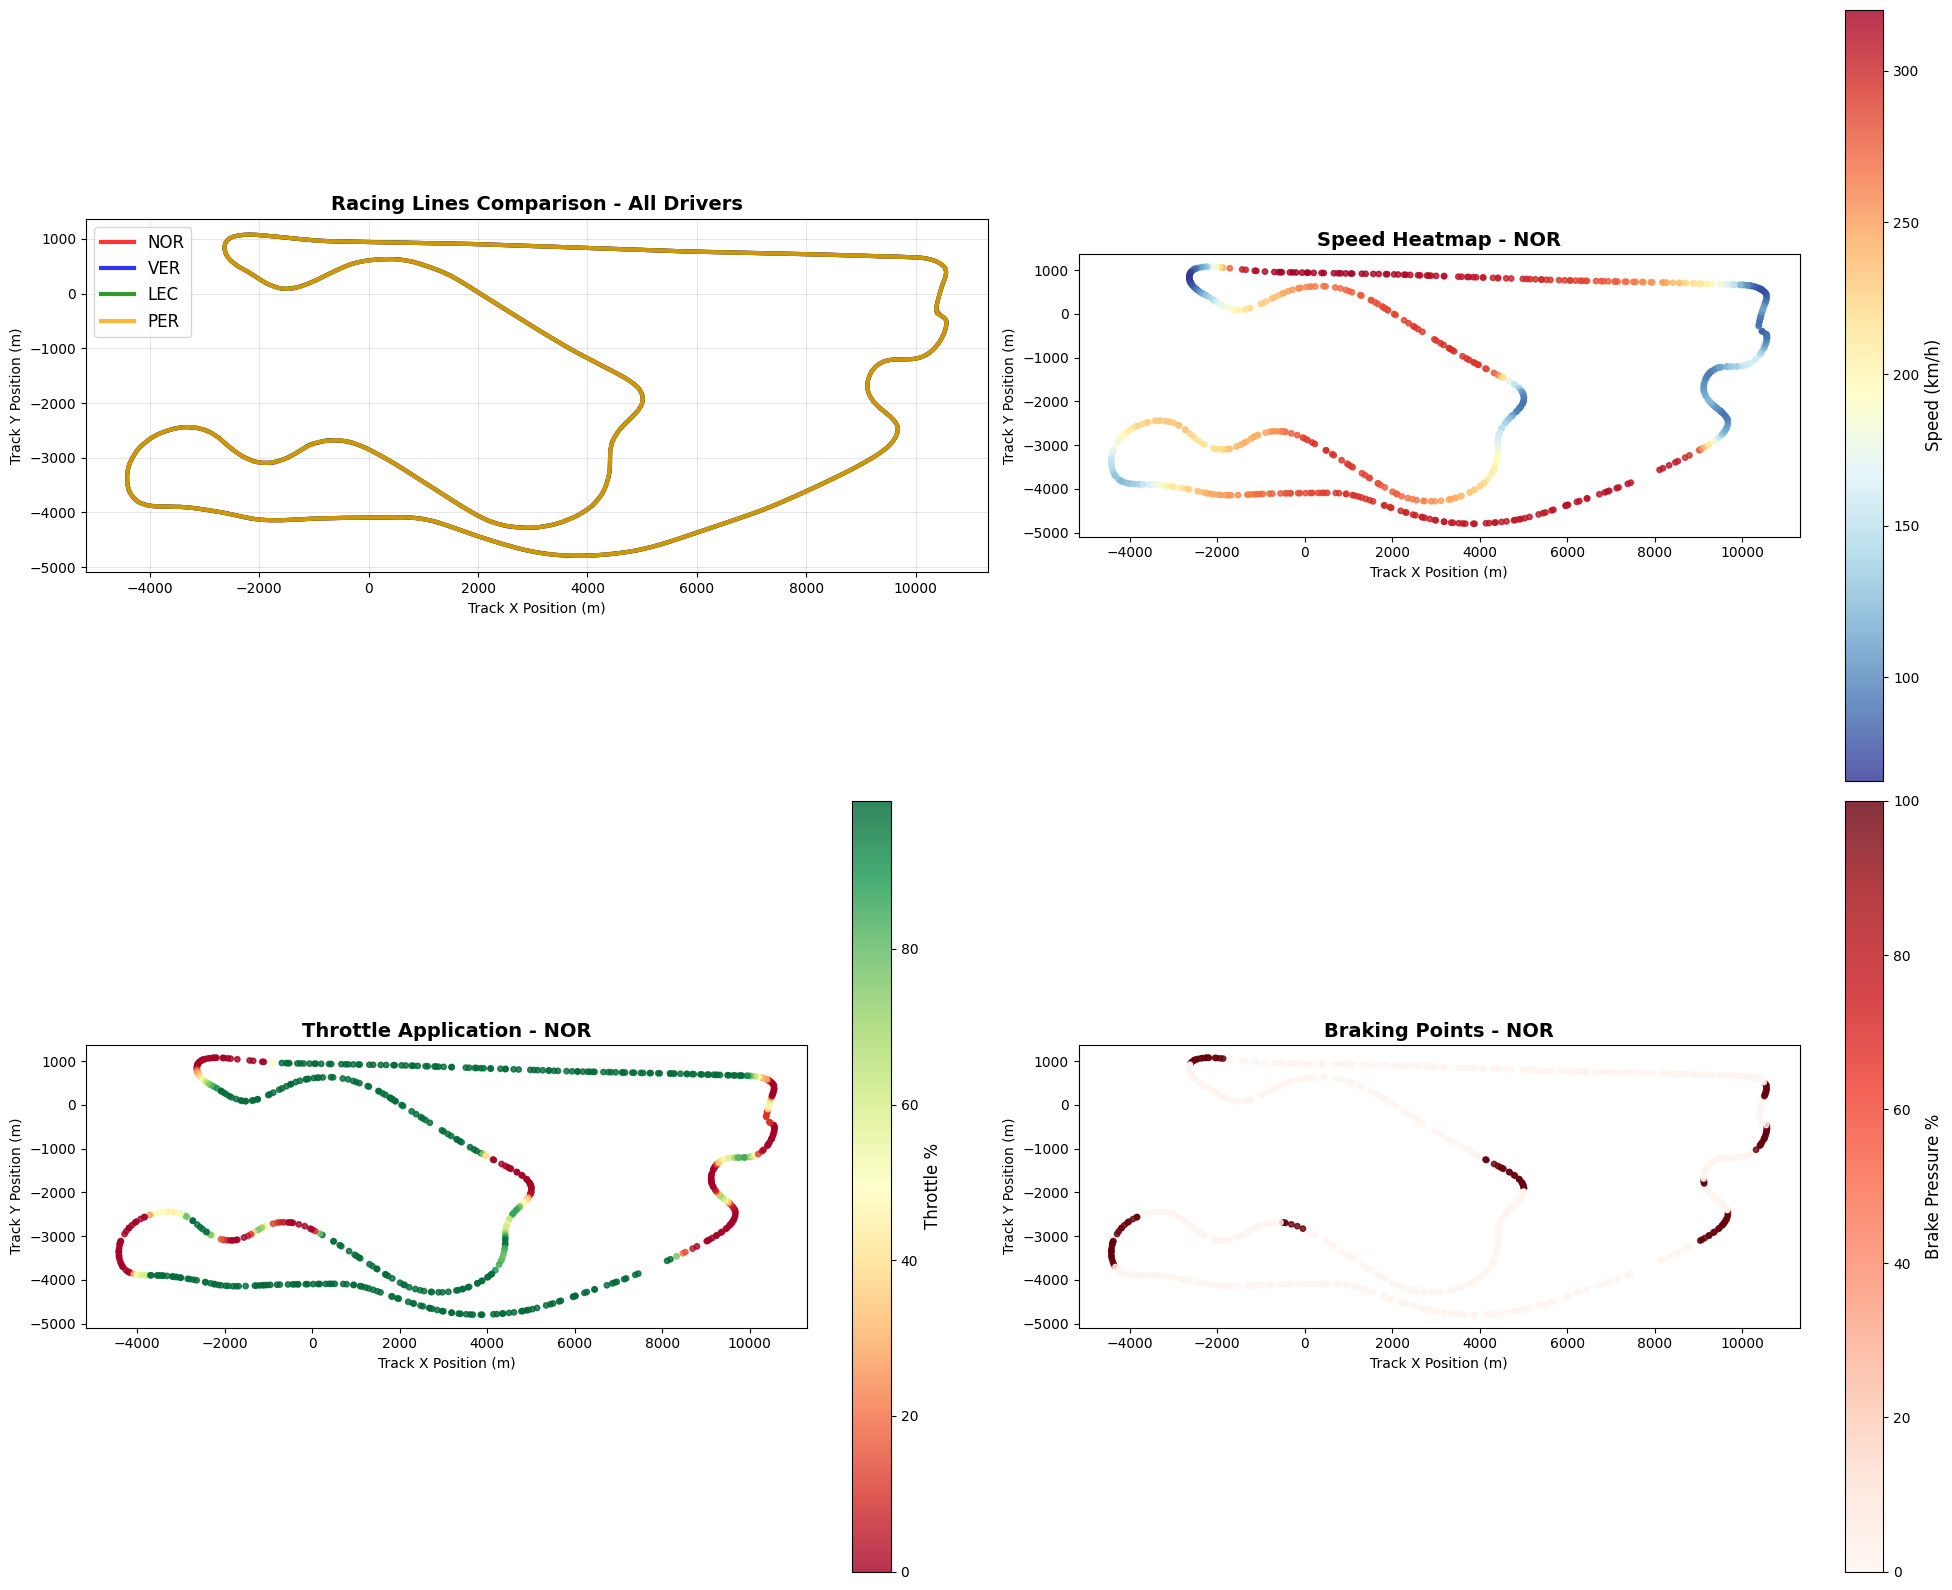

In [37]:
if racing_lines and has_position_data:
    print("Creating track visualizations with position data...")

    # Create track visualization with racing lines
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))

    # Plot 1: All racing lines overlaid
    ax1 = axes[0,0]
    colors = ['red', 'blue', 'green', 'orange']

    for i, (driver, telemetry) in enumerate(racing_lines.items()):
        if not telemetry.empty and 'X' in telemetry.columns and 'Y' in telemetry.columns:
            ax1.plot(telemetry['X'], telemetry['Y'],
                    color=colors[i % len(colors)],
                    linewidth=3,
                    label=f'{driver}',
                    alpha=0.8)

    ax1.set_title('Racing Lines Comparison - All Drivers', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Track X Position (m)')
    ax1.set_ylabel('Track Y Position (m)')
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')

    # Plot 2: Speed visualization on track
    ax2 = axes[0,1]

    # Use the fastest driver's line as base
    fastest_driver = track_drivers[0]
    base_telemetry = racing_lines.get(fastest_driver)

    if (base_telemetry is not None and not base_telemetry.empty and
        'X' in base_telemetry.columns and 'Y' in base_telemetry.columns and
        'Speed' in base_telemetry.columns):

        scatter = ax2.scatter(base_telemetry['X'], base_telemetry['Y'],
                             c=base_telemetry['Speed'],
                             cmap='RdYlBu_r',
                             s=15,
                             alpha=0.8)

        ax2.set_title(f'Speed Heatmap - {fastest_driver}', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Track X Position (m)')
        ax2.set_ylabel('Track Y Position (m)')
        ax2.set_aspect('equal')

        # Add colorbar
        cbar = plt.colorbar(scatter, ax=ax2)
        cbar.set_label('Speed (km/h)', fontsize=12)

    # Plot 3: Throttle application on track
    ax3 = axes[1,0]

    if (base_telemetry is not None and not base_telemetry.empty and
        'Throttle' in base_telemetry.columns):

        scatter3 = ax3.scatter(base_telemetry['X'], base_telemetry['Y'],
                              c=base_telemetry['Throttle'],
                              cmap='RdYlGn',
                              s=15,
                              alpha=0.8)

        ax3.set_title(f'Throttle Application - {fastest_driver}', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Track X Position (m)')
        ax3.set_ylabel('Track Y Position (m)')
        ax3.set_aspect('equal')

        cbar3 = plt.colorbar(scatter3, ax=ax3)
        cbar3.set_label('Throttle %', fontsize=12)

    # Plot 4: Brake pressure on track
    ax4 = axes[1,1]

    if (base_telemetry is not None and not base_telemetry.empty and
        'Brake' in base_telemetry.columns):

        # Convert brake to percentage
        brake_pct = base_telemetry['Brake'] * 100
        scatter4 = ax4.scatter(base_telemetry['X'], base_telemetry['Y'],
                              c=brake_pct,
                              cmap='Reds',
                              s=15,
                              alpha=0.8)

        ax4.set_title(f'Braking Points - {fastest_driver}', fontsize=14, fontweight='bold')
        ax4.set_xlabel('Track X Position (m)')
        ax4.set_ylabel('Track Y Position (m)')
        ax4.set_aspect('equal')

        cbar4 = plt.colorbar(scatter4, ax=ax4)
        cbar4.set_label('Brake Pressure %', fontsize=12)

    plt.tight_layout()
    plt.show()


Creating detailed racing line comparison...


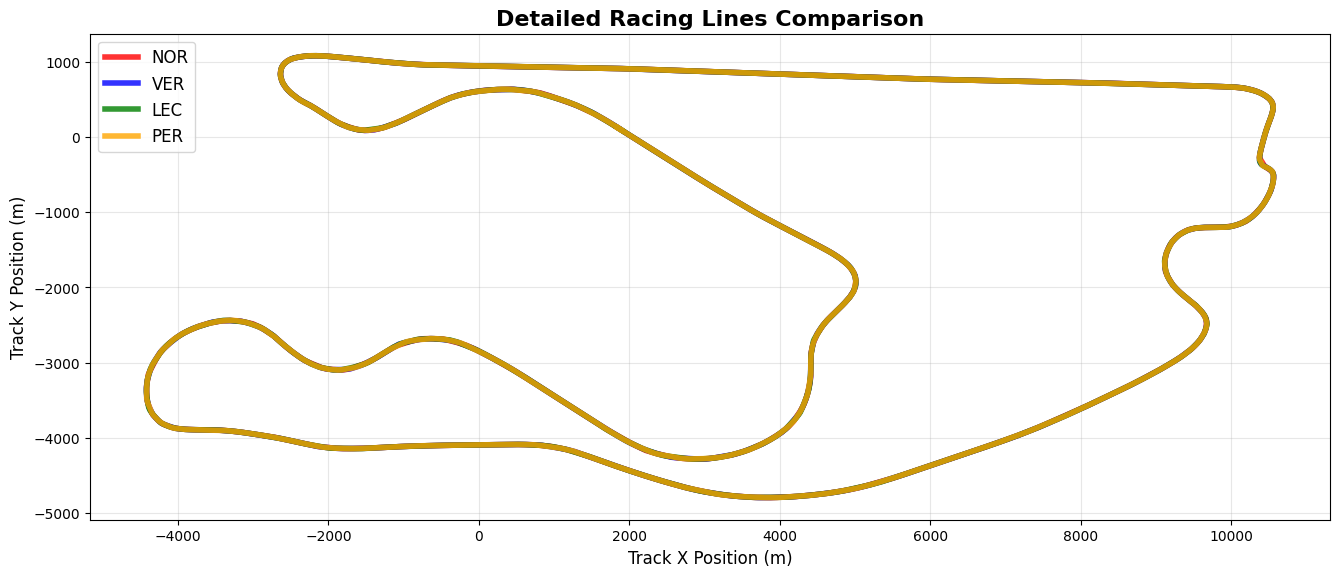

In [43]:
if racing_lines and has_position_data:
    # Create detailed comparison of racing lines
    print("\nCreating detailed racing line comparison...")
    fig, ax = plt.subplots(figsize=(16, 12))

    # Plot racing lines with different colors
    for i, (driver, telemetry) in enumerate(racing_lines.items()):
        if (not telemetry.empty and 'X' in telemetry.columns and
            'Y' in telemetry.columns and 'Speed' in telemetry.columns):

            # Use different colors for each driver
            ax.plot(telemetry['X'], telemetry['Y'],
                   color=colors[i % len(colors)],
                   linewidth=4,
                   label=f'{driver}',
                   alpha=0.8)

    ax.set_title('Detailed Racing Lines Comparison', fontsize=16, fontweight='bold')
    ax.set_xlabel('Track X Position (m)', fontsize=12)
    ax.set_ylabel('Track Y Position (m)', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

    plt.show()

Loading single driver racing line analysis...
Analyzing racing line for: NOR


/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Position data available! Creating detailed racing line analysis...


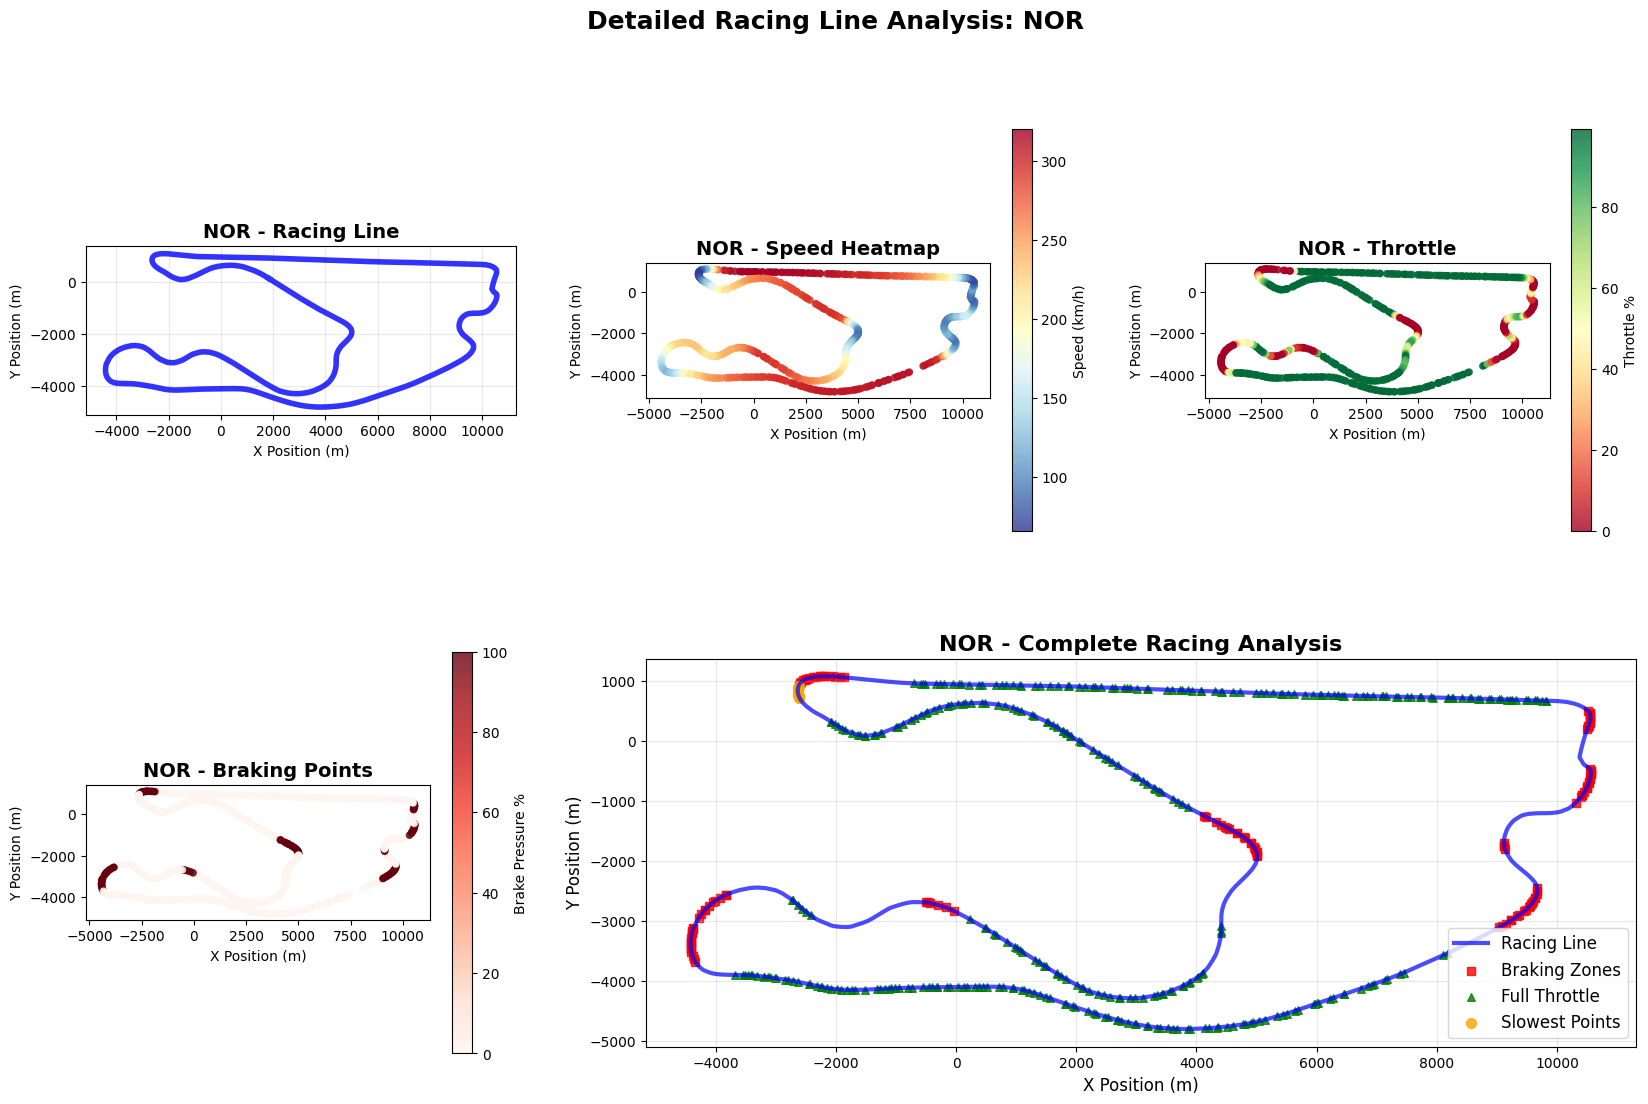

In [45]:
# Get telemetry data for single driver analysis
print("Loading single driver racing line analysis...")

# Choose which driver to analyze (you can change this!)
target_driver = top_drivers[0]  # Change index to pick different driver
print(f"Analyzing racing line for: {target_driver}")

# Get the fastest lap for our target driver
fastest_lap = laps.pick_driver(target_driver).pick_fastest()

if not fastest_lap.empty:
    try:
        # Get full telemetry data
        telemetry = fastest_lap.get_telemetry()

        # Check if position data is available
        if 'X' in telemetry.columns and 'Y' in telemetry.columns:
            print(f"Position data available! Creating detailed racing line analysis...")

            # Create comprehensive single-driver analysis
            fig = plt.figure(figsize=(20, 12))

            # Create a grid layout for multiple plots
            gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

            # Plot 1: Basic racing line
            ax1 = fig.add_subplot(gs[0, 0])
            ax1.plot(telemetry['X'], telemetry['Y'], 'b-', linewidth=4, alpha=0.8)
            ax1.set_title(f'{target_driver} - Racing Line', fontsize=14, fontweight='bold')
            ax1.set_xlabel('X Position (m)')
            ax1.set_ylabel('Y Position (m)')
            ax1.grid(True, alpha=0.3)
            ax1.set_aspect('equal')

            # Plot 2: Speed heatmap on track
            ax2 = fig.add_subplot(gs[0, 1])
            if 'Speed' in telemetry.columns:
                scatter = ax2.scatter(telemetry['X'], telemetry['Y'],
                                     c=telemetry['Speed'],
                                     cmap='RdYlBu_r',
                                     s=20,
                                     alpha=0.8)
                ax2.set_title(f'{target_driver} - Speed Heatmap', fontsize=14, fontweight='bold')
                ax2.set_xlabel('X Position (m)')
                ax2.set_ylabel('Y Position (m)')
                ax2.set_aspect('equal')
                cbar = plt.colorbar(scatter, ax=ax2)
                cbar.set_label('Speed (km/h)', fontsize=10)

            # Plot 3: Throttle application
            ax3 = fig.add_subplot(gs[0, 2])
            if 'Throttle' in telemetry.columns:
                scatter3 = ax3.scatter(telemetry['X'], telemetry['Y'],
                                      c=telemetry['Throttle'],
                                      cmap='RdYlGn',
                                      s=20,
                                      alpha=0.8)
                ax3.set_title(f'{target_driver} - Throttle', fontsize=14, fontweight='bold')
                ax3.set_xlabel('X Position (m)')
                ax3.set_ylabel('Y Position (m)')
                ax3.set_aspect('equal')
                cbar3 = plt.colorbar(scatter3, ax=ax3)
                cbar3.set_label('Throttle %', fontsize=10)

            # Plot 4: Braking zones
            ax4 = fig.add_subplot(gs[1, 0])
            if 'Brake' in telemetry.columns:
                brake_pct = telemetry['Brake'] * 100
                scatter4 = ax4.scatter(telemetry['X'], telemetry['Y'],
                                      c=brake_pct,
                                      cmap='Reds',
                                      s=20,
                                      alpha=0.8)
                ax4.set_title(f'{target_driver} - Braking Points', fontsize=14, fontweight='bold')
                ax4.set_xlabel('X Position (m)')
                ax4.set_ylabel('Y Position (m)')
                ax4.set_aspect('equal')
                cbar4 = plt.colorbar(scatter4, ax=ax4)
                cbar4.set_label('Brake Pressure %', fontsize=10)

            # Plot 5: Combined analysis (Racing line with key points)
            ax5 = fig.add_subplot(gs[1, 1:])

            # Plot the racing line
            ax5.plot(telemetry['X'], telemetry['Y'], 'blue', linewidth=3, alpha=0.7, label='Racing Line')

            # Mark braking zones
            if 'Brake' in telemetry.columns:
                braking_points = telemetry[telemetry['Brake'] > 0.1]
                if not braking_points.empty:
                    ax5.scatter(braking_points['X'], braking_points['Y'],
                               c='red', s=30, alpha=0.8, label='Braking Zones', marker='s')

            # Mark full throttle zones
            if 'Throttle' in telemetry.columns:
                full_throttle = telemetry[telemetry['Throttle'] > 95]
                if not full_throttle.empty:
                    ax5.scatter(full_throttle['X'], full_throttle['Y'],
                               c='green', s=30, alpha=0.8, label='Full Throttle', marker='^')

            # Mark slowest points (corners)
            if 'Speed' in telemetry.columns:
                slow_points = telemetry.nsmallest(10, 'Speed')  # 10 slowest points
                ax5.scatter(slow_points['X'], slow_points['Y'],
                           c='orange', s=50, alpha=0.8, label='Slowest Points', marker='o')

            ax5.set_title(f'{target_driver} - Complete Racing Analysis', fontsize=16, fontweight='bold')
            ax5.set_xlabel('X Position (m)', fontsize=12)
            ax5.set_ylabel('Y Position (m)', fontsize=12)
            ax5.legend(fontsize=12)
            ax5.grid(True, alpha=0.3)
            ax5.set_aspect('equal')

            plt.suptitle(f'Detailed Racing Line Analysis: {target_driver}', fontsize=18, fontweight='bold')
            plt.show()

    except Exception as e:
        print(f"Error loading telemetry for {target_driver}: {e}")
else:
    print(f"No racing line data available for {target_driver}.")

In [50]:
# Print detailed analysis

if 'Speed' in telemetry.columns:
    print(f"Max Speed: {telemetry['Speed'].max():.1f} km/h")
    print(f"Min Speed: {telemetry['Speed'].min():.1f} km/h")
    print(f"Average Speed: {telemetry['Speed'].mean():.1f} km/h")

    # Find the slowest corner
    slowest_idx = telemetry['Speed'].idxmin()
    slowest_point = telemetry.loc[slowest_idx]
    print(f"Slowest corner speed: {slowest_point['Speed']:.1f} km/h")
    print(f"Position: X={slowest_point['X']:.1f}m, Y={slowest_point['Y']:.1f}m")

if 'Throttle' in telemetry.columns:
    full_throttle_pct = (telemetry['Throttle'] > 95).sum() / len(telemetry) * 100
    print(f"Full throttle: {full_throttle_pct:.1f}% of lap")

if 'Brake' in telemetry.columns:
    braking_pct = (telemetry['Brake'] > 0.1).sum() / len(telemetry) * 100
    print(f"Braking: {braking_pct:.1f}% of lap")

# Track distance analysis
if 'Distance' in telemetry.columns:
    total_distance = telemetry['Distance'].max()
    print(f"Total lap distance: {total_distance:.0f}m")

else:
    print(f"Position data (X,Y coordinates) not available for {target_driver}")
    print("Creating distance-based analysis instead...")

    # Fallback to distance-based visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    # Speed trace
    if 'Distance' in telemetry.columns and 'Speed' in telemetry.columns:
        axes[0,0].plot(telemetry['Distance'], telemetry['Speed'], 'b-', linewidth=2)
        axes[0,0].fill_between(telemetry['Distance'], telemetry['Speed'], alpha=0.3)
        axes[0,0].set_title(f'{target_driver} - Speed vs Distance')
        axes[0,0].set_xlabel('Distance (m)')
        axes[0,0].set_ylabel('Speed (km/h)')
        axes[0,0].grid(True, alpha=0.3)

    # Throttle trace
    if 'Distance' in telemetry.columns and 'Throttle' in telemetry.columns:
        axes[0,1].plot(telemetry['Distance'], telemetry['Throttle'], 'g-', linewidth=2)
        axes[0,1].fill_between(telemetry['Distance'], telemetry['Throttle'], alpha=0.3, color='green')
        axes[0,1].set_title(f'{target_driver} - Throttle vs Distance')
        axes[0,1].set_xlabel('Distance (m)')
        axes[0,1].set_ylabel('Throttle %')
        axes[0,1].grid(True, alpha=0.3)

    # Brake trace
    if 'Distance' in telemetry.columns and 'Brake' in telemetry.columns:
        brake_pct = telemetry['Brake'] * 100
        axes[1,0].plot(telemetry['Distance'], brake_pct, 'r-', linewidth=2)
        axes[1,0].fill_between(telemetry['Distance'], brake_pct, alpha=0.3, color='red')
        axes[1,0].set_title(f'{target_driver} - Brake vs Distance')
        axes[1,0].set_xlabel('Distance (m)')
        axes[1,0].set_ylabel('Brake Pressure %')
        axes[1,0].grid(True, alpha=0.3)

    # Combined plot
    if 'Distance' in telemetry.columns:
        ax_combined = axes[1,1]

        if 'Speed' in telemetry.columns:
            # Normalize speed to 0-100 scale for comparison
            norm_speed = (telemetry['Speed'] - telemetry['Speed'].min()) / (telemetry['Speed'].max() - telemetry['Speed'].min()) * 100
            ax_combined.plot(telemetry['Distance'], norm_speed, 'b-', linewidth=2, label='Speed (normalized)')

        if 'Throttle' in telemetry.columns:
            ax_combined.plot(telemetry['Distance'], telemetry['Throttle'], 'g-', linewidth=2, label='Throttle %')

        if 'Brake' in telemetry.columns:
            brake_pct = telemetry['Brake'] * 100
            ax_combined.plot(telemetry['Distance'], brake_pct, 'r-', linewidth=2, label='Brake %')

        ax_combined.set_title(f'{target_driver} - Combined Telemetry')
        ax_combined.set_xlabel('Distance (m)')
        ax_combined.set_ylabel('Percentage / Normalized')
        ax_combined.legend()
        ax_combined.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

Max Speed: 325.0 km/h
Min Speed: 65.0 km/h
Average Speed: 211.0 km/h
Slowest corner speed: 65.0 km/h
Position: X=-2636.5m, Y=825.6m
Full throttle: 51.8% of lap
Braking: 19.0% of lap
Total lap distance: 5346m


In [52]:
# Corner speed analysis
if racing_lines and has_position_data:
    print("\n=== CORNER ANALYSIS ===")

    # Find minimum speeds (corners) for each driver
    corner_analysis = {}
    for driver, telemetry in racing_lines.items():
        if not telemetry.empty and 'Speed' in telemetry.columns:
            min_speed_idx = telemetry['Speed'].idxmin()
            corner_data = telemetry.loc[min_speed_idx]

            corner_analysis[driver] = {
                'min_speed': corner_data['Speed'],
                'position': (corner_data['X'], corner_data['Y']),
                'throttle': corner_data.get('Throttle', 'N/A'),
                'brake': corner_data.get('Brake', 'N/A')
            }

            print(f"{driver}:")
            print(f"  Slowest corner speed: {corner_data['Speed']:.1f} km/h")
            if 'Throttle' in corner_data:
                print(f"  Throttle at slowest point: {corner_data['Throttle']:.1f}%")
            if 'Brake' in corner_data:
                print(f"  Brake pressure: {corner_data.get('Brake', 0)*100:.1f}%")
            print()

    # Create sector-based analysis
    if racing_lines:
        print("=== SECTOR SPEED COMPARISON ===")

        # Divide track into sectors based on distance
        for driver, telemetry in racing_lines.items():
            if not telemetry.empty and 'Distance' in telemetry.columns and 'Speed' in telemetry.columns:
                total_distance = telemetry['Distance'].max()

                sector1 = telemetry[telemetry['Distance'] <= total_distance/3]
                sector2 = telemetry[(telemetry['Distance'] > total_distance/3) &
                                  (telemetry['Distance'] <= 2*total_distance/3)]
                sector3 = telemetry[telemetry['Distance'] > 2*total_distance/3]

                print(f"{driver}:")
                print(f"  Sector 1 avg speed: {sector1['Speed'].mean():.1f} km/h")
                print(f"  Sector 2 avg speed: {sector2['Speed'].mean():.1f} km/h")
                print(f"  Sector 3 avg speed: {sector3['Speed'].mean():.1f} km/h")
                print()


=== CORNER ANALYSIS ===
NOR:
  Slowest corner speed: 66.0 km/h
  Throttle at slowest point: 15.0%
  Brake pressure: 0.0%

VER:
  Slowest corner speed: 64.0 km/h
  Throttle at slowest point: 13.0%
  Brake pressure: 0.0%

LEC:
  Slowest corner speed: 64.0 km/h
  Throttle at slowest point: 9.0%
  Brake pressure: 0.0%

PER:
  Slowest corner speed: 65.0 km/h
  Throttle at slowest point: 12.0%
  Brake pressure: 0.0%

=== SECTOR SPEED COMPARISON ===
NOR:
  Sector 1 avg speed: 212.6 km/h
  Sector 2 avg speed: 195.0 km/h
  Sector 3 avg speed: 230.8 km/h

VER:
  Sector 1 avg speed: 211.1 km/h
  Sector 2 avg speed: 194.6 km/h
  Sector 3 avg speed: 229.1 km/h

LEC:
  Sector 1 avg speed: 212.1 km/h
  Sector 2 avg speed: 195.3 km/h
  Sector 3 avg speed: 228.4 km/h

PER:
  Sector 1 avg speed: 213.6 km/h
  Sector 2 avg speed: 192.6 km/h
  Sector 3 avg speed: 230.8 km/h




Creating alternative track visualization...


/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


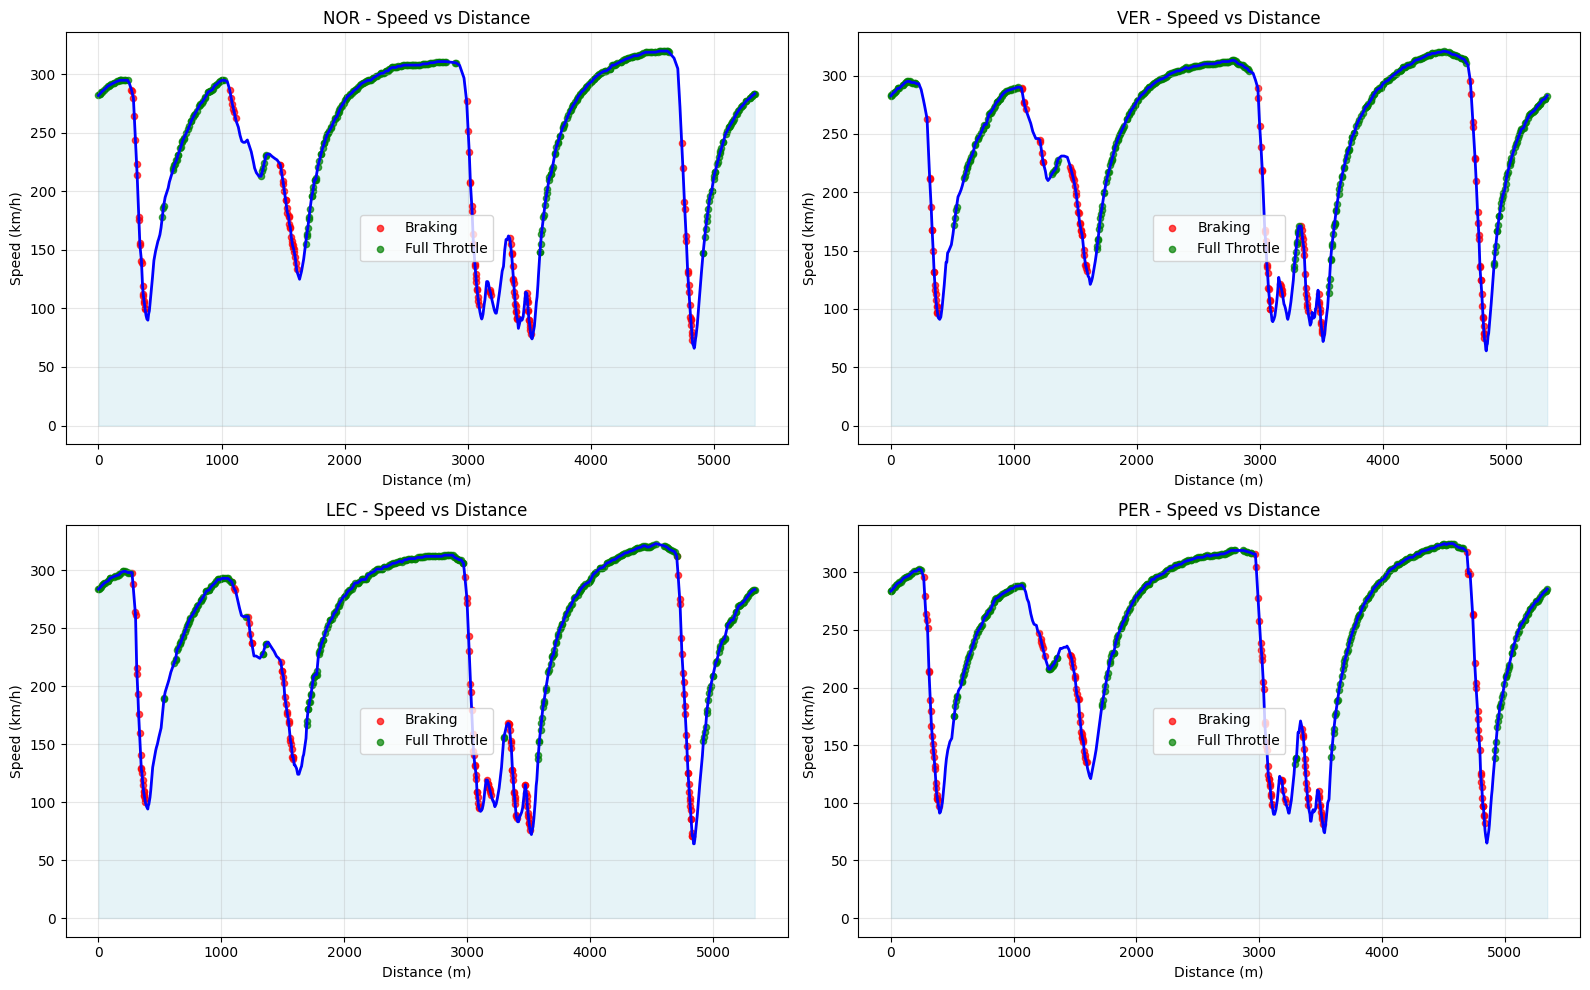

In [53]:
# Alternative track visualization using basic telemetry
print("\nCreating alternative track visualization...")

# Use distance-based visualization as backup
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for i, driver in enumerate(track_drivers[:4]):
    ax = axes[i//2, i%2]

    fastest_lap = laps.pick_driver(driver).pick_fastest()
    if not fastest_lap.empty:
        tel = fastest_lap.get_telemetry()

        if not tel.empty:
            # Speed trace around track
            ax.plot(tel['Distance'], tel['Speed'], linewidth=2, color='blue')
            ax.fill_between(tel['Distance'], tel['Speed'], alpha=0.3, color='lightblue')

            # Mark braking zones
            if 'Brake' in tel.columns:
                braking_zones = tel[tel['Brake'] > 0.1]
                if not braking_zones.empty:
                    ax.scatter(braking_zones['Distance'], braking_zones['Speed'],
                             c='red', s=20, alpha=0.7, label='Braking')

            # Mark throttle zones
            if 'Throttle' in tel.columns:
                full_throttle = tel[tel['Throttle'] > 95]
                if not full_throttle.empty:
                    ax.scatter(full_throttle['Distance'], full_throttle['Speed'],
                             c='green', s=20, alpha=0.7, label='Full Throttle')

            ax.set_title(f'{driver} - Speed vs Distance')
            ax.set_xlabel('Distance (m)')
            ax.set_ylabel('Speed (km/h)')
            ax.grid(True, alpha=0.3)
            ax.legend()

plt.tight_layout()
plt.show()